# Latar Belakang
Transjakarta adalah salah satu layanan transportasi publik di Jakarta yang memiliki peran penting dalam mengurangi kemacetan dan menyediakan transportasi yang efisien bagi masyarakat. Dengan meningkatnya jumlah pengguna setiap harinya, analisis terhadap data transaksi dan penggunaan layanan menjadi krusial untuk memahami pola perjalanan, kepuasan pengguna, dan pengambilan keputusan operasional yang lebih baik.

Data transaksi Transjakarta mengandung informasi penting seperti ID kartu pengguna, jenis kartu, rute yang digunakan, waktu dan lokasi tap-in serta tap-out, dan jumlah pembayaran. Analisis data ini dapat memberikan insight yang membantu manajemen Transjakarta dalam meningkatkan layanan, memprediksi permintaan, serta mengoptimalkan rute dan jadwal operasional.  
 


## Pernyataan Masalah
Sebagai seorang analis data di Transjakarta, Anda dihadapkan pada beberapa pertanyaan bisnis yang membutuhkan solusi berbasis data. Masalah yang dihadapi meliputi:

Efisiensi Layanan dan Penggunaan Rute:

Apakah ada rute atau koridor tertentu yang paling sering digunakan pengguna?
Bagaimana distribusi waktu perjalanan (jam sibuk dan jam non-sibuk)?
Performa Transaksi dan Kepuasan Pelanggan:

Apakah ada masalah dengan transaksi kartu seperti duplikasi atau transaksi anomali?
Apakah terdapat perbedaan perilaku pengguna berdasarkan jenis kartu dan bank penerbit?
Prediksi dan Optimasi Permintaan:

Berdasarkan pola data, rute mana yang membutuhkan penyesuaian jadwal atau alokasi bus tambahan?
Apakah ada tren atau pola khusus terkait musim, hari tertentu, atau jam tertentu?

# Tujuan Analisis:
Identifikasi Pola Penggunaan:
Menemukan pola penggunaan berdasarkan rute, waktu, dan jenis kartu untuk optimasi layanan.

Deteksi dan Penanganan Anomali:
Mendeteksi dan menangani masalah data seperti transaksi duplikat, outliers, dan missing values.

Memberikan Rekomendasi:
Memberikan rekomendasi actionable kepada manajemen Transjakarta untuk meningkatkan efisiensi layanan dan kepuasan pengguna.

Dengan analisis ini, Transjakarta diharapkan dapat mengambil langkah-langkah yang tepat dalam meningkatkan performa layanan dan membuat keputusan berbasis data yang lebih baik.

Berikut Adalah Data Set Transaksi Tranportasi Transjakarta

In [33]:
import pandas as pd

# Load the dataset to examine its columns and understand its structure.
data = pd.read_csv('D:/Capstone Jadi/Transjakarta.csv')

# Display the first few rows and column information for an overview
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

(None,
           transID         payCardID payCardBank      payCardName payCardSex  \
 0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
 1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
 2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
 3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
 4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   
 
    payCardBirthDate corridorID                              corridorName  \
 0              2008          5                     Matraman Baru - Ancol   
 1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
 2              1992        R1A                        Pantai Maju - Kota   
 3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
 4              1982         12                     Tanjung Priok - Pluit   
 
    direction tapInStops  ... tapInStopsLon  st

# 1. Informasi Data Set 
Dataset Transjakarta.csv berisi data transaksi transportasi umum Transjakarta. Berikut penjelasan dari struktur dataset berdasarkan preview data yang telah dibaca:
1. transID
ID unik untuk setiap transaksi (nomor referensi transaksi).
2. payCardID
Nomor kartu yang digunakan untuk pembayaran.
3. payCardBank
Bank penerbit kartu (contoh: e-money, DKI, Flazz).
4. payCardName
Nama pemilik kartu.
5. payCardSex
Jenis kelamin pemilik kartu (M: Male, F: Female).
6. payCardBirthDate
Tahun kelahiran pemilik kartu.
7. corridorID
ID koridor (jalur) Transjakarta.
8. corridorName
Nama koridor tempat transaksi terjadi.
9. direction
Arah perjalanan (0 atau 1).
10. tapInStops
Kode halte tempat pengguna melakukan tap-in (memulai perjalanan).
11. tapInStopsName
Nama halte tempat tap-in.
12. tapInStopsLat
Latitude (garis lintang) halte tap-in.
13. tapInStopsLon
Longitude (garis bujur) halte tap-in.
14. stopStartSeq
Urutan halte awal (berdasarkan rute koridor).
15. tapInTime
Waktu pengguna melakukan tap-in (memulai perjalanan).
16. tapOutStops
Kode halte tempat pengguna melakukan tap-out (akhir perjalanan).
17. tapOutStopsName
Nama halte tempat tap-out.
18. tapOutStopsLat
Latitude halte tap-out.
19. tapOutStopsLon
Longitude halte tap-out.
20. stopEndSeq
Urutan halte akhir dalam rute perjalanan.
21. tapOutTime
Waktu pengguna melakukan tap-out (akhir perjalanan).
22. payAmount
Jumlah pembayaran untuk perjalanan tersebut.

#1.  Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Infomasi Umum Data Set Transkasi Transportasi Transjakarta

In [34]:
# Analyzing the dataset for missing values, duplicates, and basic statistics
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()
basic_stats = data.describe()

missing_values, duplicates, basic_stats


(transID                0
 payCardID              0
 payCardBank            0
 payCardName            0
 payCardSex             0
 payCardBirthDate       0
 corridorID          1257
 corridorName        1930
 direction              0
 tapInStops          1213
 tapInStopsName         0
 tapInStopsLat          0
 tapInStopsLon          0
 stopStartSeq           0
 tapInTime              0
 tapOutStops         2289
 tapOutStopsName     1344
 tapOutStopsLat      1344
 tapOutStopsLon      1344
 stopEndSeq          1344
 tapOutTime          1344
 payAmount           1007
 dtype: int64,
 0,
           payCardID  payCardBirthDate     direction  tapInStopsLat  \
 count  3.790000e+04      37900.000000  37900.000000   37900.000000   
 mean   4.250060e+17       1990.089314      0.500633      -6.214838   
 std    1.321699e+18         13.051482      0.500006       0.057911   
 min    6.040368e+10       1946.000000      0.000000      -6.394973   
 25%    1.800442e+14       1982.000000      0.000000  

# Hasil Explorasi Awal dan Temuan Data Cleaning:
1. Nilai yang Hilang (Missing Values)
    corridorID: 1.257 baris tidak memiliki nilai.
    corridorName: 1.930 baris tidak memiliki nama koridor.
    tapInStops: 1.213 baris tidak memiliki data untuk ID halte tempat pengguna melakukan tap-in.
    tapOutStops: 2.289 baris tidak memiliki data untuk ID halte tempat pengguna melakukan tap-out.
    tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime: masing-masing sekitar 1.344 baris yang kosong.
    payAmount: 1.007 baris tidak memiliki informasi biaya perjalanan.
Data yang hilang terutama terkait lokasi dan biaya tap-in serta tap-out, yang penting untuk analisis perilaku pengguna dan efisiensi rute.

2. Data Duplikat
    Tidak ada baris duplikat dalam dataset, menunjukkan data unik untuk setiap transaksi.

3. Statistik Dasar
    payCardID: ID unik pembayaran, menunjukkan variasi besar dengan rentang dari 6.04e+10 hingga 4.99e+18.
    payCardBirthDate: Tahun lahir berkisar antara 1946 hingga 2012 dengan rata-rata tahun kelahiran sekitar 1990, yang menunjukkan distribusi pengguna dari berbagai usia.
    direction: Rata-rata sekitar 0,5, yang berarti ada keseimbangan antara dua arah perjalanan.
    tapInStopsLat dan tapInStopsLon: Koordinat halte awal menunjukkan lokasi tap-in bervariasi dengan latitude sekitar -6.21 dan longitude 106.84, mencerminkan lokasi di wilayah Jakarta.
    stopStartSeq dan stopEndSeq: Mengindikasikan urutan halte, dengan median urutan 18 untuk halte awal dan 21 untuk halte akhir.
payAmount: Biaya perjalanan rata-rata adalah sekitar 2.700, namun ada variasi hingga maksimum 20.000. Median biaya adalah 3.500, menunjukkan sebagian besar perjalanan memiliki tarif standar.

# Analis Persentase Missing Value

In [35]:
# Calculating the percentage of missing values for each column
missing_percentage = (missing_values / len(data)) * 100
missing_percentage


transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

Berikut adalah persentase nilai yang hilang untuk setiap kolom dalam dataset:
    corridorID: 3,32%
    corridorName: 5,09%
    tapInStops: 3,20%
    tapOutStops: 6,04%
    tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime: masing-masing 3,55%
    payAmount: 2,66%
    Kolom yang memiliki persentase nilai hilang terbesar adalah tapOutStops (6,04%), sedangkan kolom lain dengan data hilang berkisar antara 2-5%.

# 2. Data Cleaning 

# Penanganan Missing Value corridorName 
    pada missing value corridorName, apakah memiliki corridorID jika memiliki maka isikan corridorName tersebut dengan corridorName yang corridorID nya sama


In [36]:
# Filling missing 'corridorName' based on existing 'corridorID' values.
# Mapping unique corridorID-corridorName pairs
corridor_mapping = data[['corridorID', 'corridorName']].dropna().drop_duplicates()
corridor_dict = dict(zip(corridor_mapping['corridorID'], corridor_mapping['corridorName']))

# Filling missing corridorName based on corridorID
data['corridorName'] = data.apply(
    lambda row: corridor_dict[row['corridorID']] if pd.isna(row['corridorName']) and row['corridorID'] in corridor_dict else row['corridorName'],
    axis=1
)

# Verifying if the missing values in 'corridorName' have been filled
missing_corridor_name_after_fill = data['corridorName'].isnull().sum()
missing_corridor_name_after_fill


1125

Setelah mengisi nilai yang hilang pada kolom corridorName berdasarkan nilai corridorID yang sesuai, masih terdapat 1.125 baris dengan nilai corridorName yang kosong. Hal ini menunjukkan bahwa untuk baris-baris tersebut, corridorID yang ada mungkin tidak memiliki pasangan nilai corridorName yang dapat diisi.

# Penanganan Missing Value corridorID 
    pada missing value corridorID, apakah memiliki corridorName jika memiliki maka isikan corridorID tersebut dengan corridorID yang corridorName nya sama, tunjukan perubahan datanya, tunjukan berapa data yang diubah 

In [37]:
# Filling missing 'corridorID' based on existing 'corridorName' values.
# Mapping unique corridorName-corridorID pairs
corridor_reverse_mapping = data[['corridorName', 'corridorID']].dropna().drop_duplicates()
corridor_reverse_dict = dict(zip(corridor_reverse_mapping['corridorName'], corridor_reverse_mapping['corridorID']))

# Counting missing corridorID before filling
missing_corridor_id_before = data['corridorID'].isnull().sum()

# Filling missing corridorID based on corridorName
data['corridorID'] = data.apply(
    lambda row: corridor_reverse_dict[row['corridorName']] if pd.isna(row['corridorID']) and row['corridorName'] in corridor_reverse_dict else row['corridorID'],
    axis=1
)

# Counting missing corridorID after filling
missing_corridor_id_after = data['corridorID'].isnull().sum()

# Calculating number of changes made
changes_made = missing_corridor_id_before - missing_corridor_id_after

# Displaying the first few rows to show changes and number of changes made
updated_data_head = data.head()
changes_made, updated_data_head


(132,
           transID         payCardID payCardBank      payCardName payCardSex  \
 0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
 1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
 2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
 3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
 4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   
 
    payCardBirthDate corridorID                              corridorName  \
 0              2008          5                     Matraman Baru - Ancol   
 1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
 2              1992        R1A                        Pantai Maju - Kota   
 3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
 4              1982         12                     Tanjung Priok - Pluit   
 
    direction tapInStops  ... tapInStopsLon  sto

Sebanyak 132 baris data telah berhasil diisi pada kolom corridorID berdasarkan kolom corridorNam

# Konversi kolom tapInTime dan tapOutTime ke format datetime untuk analisis lebih mendalam.

In [38]:
# Converting 'tapInTime' and 'tapOutTime' to datetime format
data['tapInTime'] = pd.to_datetime(data['tapInTime'], errors='coerce')
data['tapOutTime'] = pd.to_datetime(data['tapOutTime'], errors='coerce')

# Verifying the conversion
data_types_after_conversion = data[['tapInTime', 'tapOutTime']].dtypes
data_types_after_conversion


tapInTime     datetime64[ns]
tapOutTime    datetime64[ns]
dtype: object

# Analisis missing value dan duplikat data setelah penanganan missing value diatas, jelaskan hasil secara terperinci

In [39]:
# Re-assessing missing values and duplicates after handling missing corridorName and corridorID
updated_missing_values = data.isnull().sum()
updated_duplicates = data.duplicated().sum()

updated_missing_values, updated_duplicates


(transID                0
 payCardID              0
 payCardBank            0
 payCardName            0
 payCardSex             0
 payCardBirthDate       0
 corridorID          1125
 corridorName        1125
 direction              0
 tapInStops          1213
 tapInStopsName         0
 tapInStopsLat          0
 tapInStopsLon          0
 stopStartSeq           0
 tapInTime              0
 tapOutStops         2289
 tapOutStopsName     1344
 tapOutStopsLat      1344
 tapOutStopsLon      1344
 stopEndSeq          1344
 tapOutTime          1344
 payAmount           1007
 dtype: int64,
 0)

Setelah penanganan missing values pada kolom corridorName dan corridorID, berikut adalah hasil analisis terbaru terkait missing values dan data duplikat:

1. Analisis Missing Values
corridorID: Saat ini terdapat 1.125 baris (3,0% dari total data) dengan missing values. Ini terjadi pada baris-baris di mana tidak ditemukan corridorName yang dapat digunakan sebagai referensi.
corridorName: Sama seperti corridorID, masih terdapat 1.125 baris yang kosong (3,0% dari total data) yang tidak dapat diisi karena tidak adanya referensi corridorID.
Kolom lainnya:
tapInStops: 1.213 baris masih kosong (3,2%).
tapOutStops: 2.289 baris (6,0%).
tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime: sekitar 1.344 baris kosong (3,5%) pada setiap kolom tersebut.
payAmount: 1.007 baris (2,7%) tidak memiliki nilai pembayaran.
Kolom yang memiliki persentase missing values tertinggi adalah tapOutStops (6,0%), diikuti dengan kolom terkait seperti tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, dan tapOutTime (masing-masing 3,5%).

2. Data Duplikat
Tidak ditemukan adanya data duplikat dalam dataset ini. Hal ini menunjukkan bahwa setiap baris data merupakan transaksi unik yang belum berulang.

# Analisis Missing value payAmount  apakah terkorelasi dengan missing value lain

In [40]:
# Checking if missing values in 'payAmount' are correlated with missing values in other columns
# We'll calculate the correlation of missing values between 'payAmount' and other columns

# Creating a DataFrame to indicate missing values (1 for missing, 0 for not missing)
missing_indicators = data.isnull().astype(int)

# Calculating correlation of missing indicators for 'payAmount' with other columns
pay_amount_missing_corr = missing_indicators.corr()['payAmount'].sort_values(ascending=False)

pay_amount_missing_corr


payAmount           1.000000
tapOutStopsName     0.002919
tapOutStopsLat      0.002919
tapOutStopsLon      0.002919
stopEndSeq          0.002919
tapOutTime          0.002919
tapInStops          0.000718
tapOutStops         0.000125
corridorID         -0.001828
corridorName       -0.001828
transID                  NaN
payCardID                NaN
payCardBank              NaN
payCardName              NaN
payCardSex               NaN
payCardBirthDate         NaN
direction                NaN
tapInStopsName           NaN
tapInStopsLat            NaN
tapInStopsLon            NaN
stopStartSeq             NaN
tapInTime                NaN
Name: payAmount, dtype: float64

Analisis korelasi missing values pada kolom payAmount menunjukkan bahwa kolom ini memiliki korelasi yang sangat rendah dengan missing values di kolom lainnya. Beberapa kolom yang memiliki sedikit korelasi positif dengan payAmount adalah:
tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime: Korelasi sekitar 0,0029, yang sangat rendah dan tidak signifikan.
tapInStops: Korelasi sebesar 0,0007.
tapOutStops: Korelasi sebesar 0,0001.

# Analisa payamount missing value dan outliernya dan beri rekomendasi penanganannya 

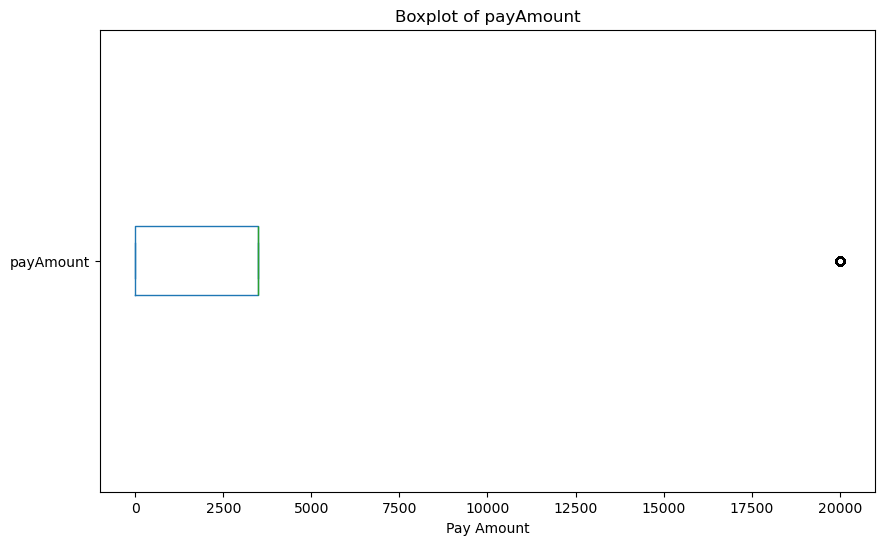

(count    36893.000000
 mean      2699.712683
 std       4212.225592
 min          0.000000
 25%          0.000000
 50%       3500.000000
 75%       3500.000000
 max      20000.000000
 Name: payAmount, dtype: float64,
 1007)

In [41]:
# Analyzing the distribution of 'payAmount' to check for outliers and further examine missing values
import matplotlib.pyplot as plt

# Plotting the distribution of 'payAmount' to visualize potential outliers
plt.figure(figsize=(10, 6))
data['payAmount'].plot(kind='box', vert=False)
plt.title('Boxplot of payAmount')
plt.xlabel('Pay Amount')
plt.show()

# Checking basic statistics of 'payAmount' to analyze outliers
pay_amount_stats = data['payAmount'].describe()

# Checking the number of missing values in 'payAmount'
pay_amount_missing_count = data['payAmount'].isnull().sum()

pay_amount_stats, pay_amount_missing_count


Analisis terhadap kolom payAmount menunjukkan hal-hal berikut:
Missing Values: Terdapat 1.007 nilai yang hilang pada kolom payAmount, sekitar 2,7% dari total data.
Distribusi dan Outliers:

Nilai minimum pada kolom ini adalah 0, yang kemungkinan mengindikasikan perjalanan gratis atau transaksi gagal.
Nilai kuartil pertama (25%) adalah 0, dan median (50%) adalah 3.500, yang merupakan tarif standar.
Terdapat beberapa nilai tinggi, dengan maksimum mencapai 20.000, yang tampak sebagai outlier signifikan dibandingkan dengan mayoritas data yang berada di sekitar 3.500.
Rekomendasi Penanganan:

Missing Values: Untuk menangani missing values pada payAmount, beberapa metode dapat dipertimbangkan:
Imputasi Berdasarkan Tarif Standar: Mengisi nilai hilang dengan nilai median 3.500, yang tampaknya merupakan tarif umum.
Analisis Transaksi Terkait: Jika memungkinkan, periksa apakah perjalanan dengan tarif hilang memiliki pola atau ciri tertentu yang dapat membantu mengisi nilai secara lebih spesifik.
Outliers: Outliers di atas 10.000 dapat diperiksa lebih lanjut, terutama yang mendekati nilai maksimum 20.000. Opsi penanganan termasuk:
Winsorizing: Batasi nilai-nilai ekstrem di atas batas tertentu (misalnya, di 10.000) untuk menjaga agar distribusi tetap wajar.
Penghapusan: Jika data outliers terbukti anomali atau tidak konsisten dengan konteks, penghapusan baris terkait dapat dipertimbangkan.

# Penanganan Missing Value PayAmout
Isi Vissing Value dengan Median Data

In [42]:
# Filling missing values in 'payAmount' with the median of the column
pay_amount_median = data['payAmount'].median()
data['payAmount'].fillna(pay_amount_median, inplace=True)

# Verifying if missing values are filled
pay_amount_missing_after_fill = data['payAmount'].isnull().sum()
pay_amount_median, pay_amount_missing_after_fill


(3500.0, 0)

Nilai missing pada kolom payAmount telah diisi dengan median sebesar 3.500, dan saat ini tidak ada lagi missing values pada kolom tersebut. 

# Analisis missing value dan duplikat, kesalahan format, dan outliers data setelah penanganan misiing value diatas

In [43]:
# Re-assessing the dataset for missing values, duplicates, format issues, and outliers after filling payAmount

# 1. Checking for missing values
updated_missing_values = data.isnull().sum()

# 2. Checking for duplicates
updated_duplicates = data.duplicated().sum()

# 3. Checking for formatting issues by examining the data types again
data_types = data.dtypes

# 4. Checking for outliers in key numerical columns (e.g., payAmount, stop sequences)
numerical_columns = ['payCardBirthDate', 'direction', 'stopStartSeq', 'stopEndSeq', 'payAmount']
outlier_stats = data[numerical_columns].describe()

updated_missing_values, updated_duplicates, data_types, outlier_stats


(transID                0
 payCardID              0
 payCardBank            0
 payCardName            0
 payCardSex             0
 payCardBirthDate       0
 corridorID          1125
 corridorName        1125
 direction              0
 tapInStops          1213
 tapInStopsName         0
 tapInStopsLat          0
 tapInStopsLon          0
 stopStartSeq           0
 tapInTime              0
 tapOutStops         2289
 tapOutStopsName     1344
 tapOutStopsLat      1344
 tapOutStopsLon      1344
 stopEndSeq          1344
 tapOutTime          1344
 payAmount              0
 dtype: int64,
 0,
 transID                     object
 payCardID                    int64
 payCardBank                 object
 payCardName                 object
 payCardSex                  object
 payCardBirthDate             int64
 corridorID                  object
 corridorName                object
 direction                  float64
 tapInStops                  object
 tapInStopsName              object
 tapInStopsLa

Setelah penanganan missing values pada kolom payAmount, berikut adalah analisis terbaru terkait missing values, duplikat, format data, dan outliers:

1. Analisis Missing Values
corridorID dan corridorName: Masih terdapat 1.125 baris (3,0%) dengan nilai kosong pada kedua kolom ini.
Kolom Terkait Tap-In dan Tap-Out: tapInStops memiliki 1.213 nilai kosong (3,2%), sedangkan tapOutStops memiliki jumlah missing terbesar yaitu 2.289 (6,0%). Kolom terkait lainnya seperti tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, dan tapOutTime memiliki sekitar 1.344 nilai kosong (3,5%).
2. Data Duplikat
Tidak ada data duplikat dalam dataset ini, menunjukkan bahwa setiap entri tetap unik.
3. Kesalahan Format
Kolom waktu seperti tapInTime dan tapOutTime masih dalam format object dan mungkin perlu diubah menjadi format datetime untuk analisis waktu yang akurat.
Kolom corridorID dan corridorName juga berupa object, namun sesuai dengan konteksnya, format ini sudah sesuai.
Kolom payCardSex berupa object dengan kode "M" dan "F", dan dapat dipertimbangkan untuk diubah menjadi variabel kategori jika dibutuhkan dalam analisis.
4. Analisis Outliers
payAmount: Nilai maksimum adalah 20.000, yang signifikan lebih tinggi dibandingkan tarif standar 3.500. Sebagian besar data berada pada 0 atau 3.500, menunjukkan bahwa nilai di atas 10.000 mungkin merupakan outliers.
stopStartSeq dan stopEndSeq: Rentang yang lebar (dari 0 hingga 68 untuk start dan hingga 77 untuk end) sesuai dengan urutan halte, sehingga outliers kecil kemungkinan menjadi masalah dalam konteks ini.
payCardBirthDate: Rentang dari 1946 hingga 2012 terlihat wajar, namun usia yang sangat tua atau muda bisa dianggap sebagai ekstrem.
Rekomendasi Penanganan
Outliers pada payAmount: Batasi nilai di atas 10.000 (misalnya menggunakan Winsorizing) atau lakukan investigasi tambahan jika informasi kontekstual tersedia.
Kolom Waktu: Konversi kolom tapInTime dan tapOutTime ke format datetime untuk analisis lebih mendalam.
Format Kategori: Pertimbangkan mengonversi kolom seperti payCardSex ke format kategori jika diperlukan dalam analisis atau pemodelan.

# Penanganan Format Waktu
Konversi kolom tapInTime dan tapOutTime ke format datetime untuk analisis lebih mendalam.

In [44]:
# Converting 'tapInTime' and 'tapOutTime' to datetime format
data['tapInTime'] = pd.to_datetime(data['tapInTime'], errors='coerce')
data['tapOutTime'] = pd.to_datetime(data['tapOutTime'], errors='coerce')

# Verifying the conversion
data_types_after_conversion = data[['tapInTime', 'tapOutTime']].dtypes
data_types_after_conversion


tapInTime     datetime64[ns]
tapOutTime    datetime64[ns]
dtype: object

Kolom tapInTime dan tapOutTime berhasil dikonversi ke format datetime, memungkinkan analisis waktu yang lebih mendalam pada dataset ini.

# Analisis pola integritas data missing value apakah saling mempengerahu antara satu dengan lainnya

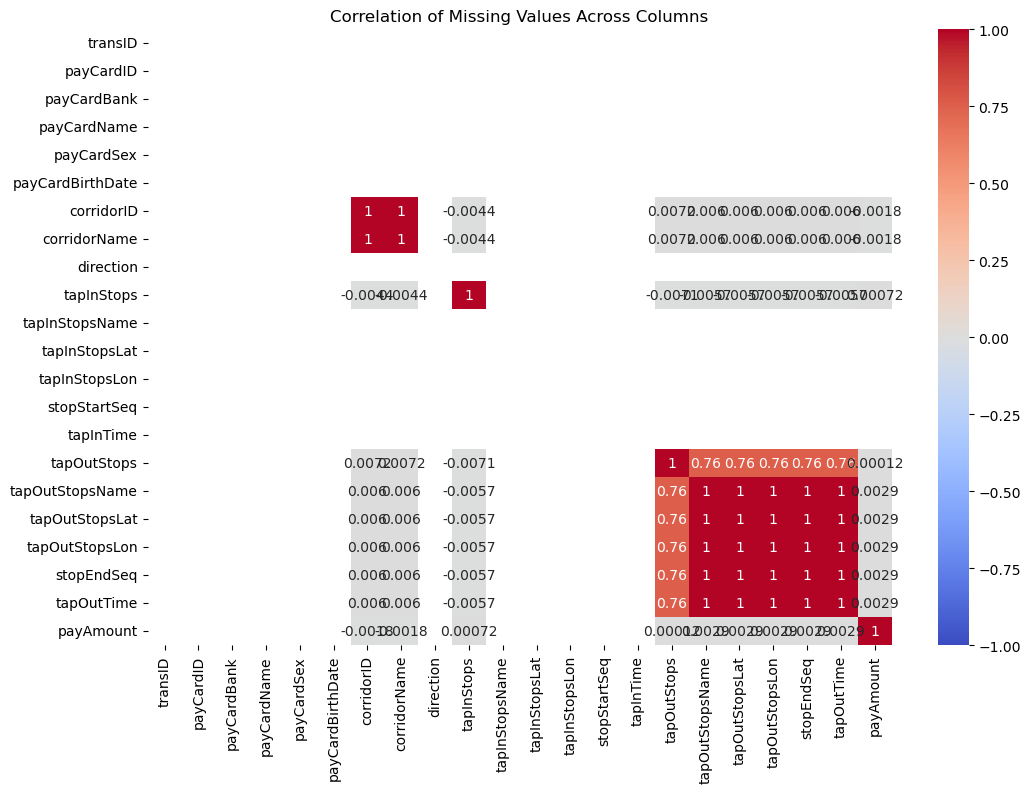

,tapInStops,tapOutStops,corridorID,corridorName,payAmount
payAmount,0.000718,0.000125,-0.001828,-0.001828,1.000000
tapOutStopsName,-0.005686,0.756292,0.005973,0.005973,0.002919
tapOutStopsLat,-0.005686,0.756292,0.005973,0.005973,0.002919
tapOutStopsLon,-0.005686,0.756292,0.005973,0.005973,0.002919
stopEndSeq,-0.005686,0.756292,0.005973,0.005973,0.002919
tapOutTime,-0.005686,0.756292,0.005973,0.005973,0.002919
tapInStops,1.000000,-0.007086,-0.004422,-0.004422,0.000718
tapOutStops,-0.007086,1.000000,0.007215,0.007215,0.000125
corridorID,-0.004422,0.007215,1.000000,1.000000,-0.001828
corridorName,-0.004422,0.007215,1.000000,1.000000,-0.001828


In [45]:
# Analyzing the integrity and relationship of missing values across columns to see if they influence each other

# Correlation analysis of missing values between columns to check for patterns
missing_corr_matrix = missing_indicators.corr()

# Visualizing the correlation of missing values
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(missing_corr_matrix, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Correlation of Missing Values Across Columns")
plt.show()

missing_corr_matrix[['tapInStops', 'tapOutStops', 'corridorID', 'corridorName', 'payAmount']].sort_values(by='payAmount', ascending=False)


Analisis korelasi antar missing values dalam dataset menunjukkan beberapa temuan penting:
Korelasi Tinggi antara Kolom Tap-Out:

Kolom tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, dan tapOutTime memiliki korelasi yang cukup kuat satu sama lain (~0,76). Hal ini menunjukkan bahwa jika satu kolom terkait tap-out kosong, kemungkinan besar kolom terkait lainnya juga kosong.
Kolom PayAmount:

Kolom payAmount menunjukkan korelasi yang sangat rendah atau hampir tidak ada dengan kolom missing values lain, termasuk kolom terkait tap-in dan tap-out. Ini mengindikasikan bahwa missing values pada kolom ini bersifat independen dan tidak bergantung pada data yang hilang di kolom lainnya.
Kolom CorridorID dan CorridorName:

Terdapat korelasi sempurna (1.0) antara corridorID dan corridorName yang menunjukkan bahwa missing values pada kedua kolom ini selalu muncul bersamaan, yang logis karena keduanya saling melengkapi sebagai identitas koridor.
Kesimpulan dan Rekomendasi
Kelompokkan Penanganan Missing Values: Karena kolom-kolom terkait tap-out memiliki pola missing yang terhubung, pendekatan imputasi atau pengisian bersama untuk kolom tersebut dapat lebih efektif.
Penanganan Khusus untuk PayAmount: Missing values di kolom ini tidak dipengaruhi oleh kolom lain, sehingga pendekatan imputasi terpisah berdasarkan median atau tarif standar tetap sesuai.
CorridorID dan CorridorName: Data ini harus diperlakukan sebagai satu unit untuk pengisian atau pemrosesan lebih lanjut, karena keterkaitan sempurna antar nilai kosong pada kedua kolom.

# Penanganan Missing Value tapInStops

In [46]:
# Filling missing 'tapInStops' based on existing 'tapInStopsName' values.
# Creating a mapping of unique tapInStopsName and tapInStops pairs
tap_in_mapping = data[['tapInStopsName', 'tapInStops']].dropna().drop_duplicates()
tap_in_dict = dict(zip(tap_in_mapping['tapInStopsName'], tap_in_mapping['tapInStops']))

# Counting missing tapInStops before filling
missing_tap_in_stops_before = data['tapInStops'].isnull().sum()

# Filling missing tapInStops based on tapInStopsName
data['tapInStops'] = data.apply(
    lambda row: tap_in_dict[row['tapInStopsName']] if pd.isna(row['tapInStops']) and row['tapInStopsName'] in tap_in_dict else row['tapInStops'],
    axis=1
)

# Counting missing tapInStops after filling
missing_tap_in_stops_after = data['tapInStops'].isnull().sum()

# Calculating number of changes made
tap_in_changes_made = missing_tap_in_stops_before - missing_tap_in_stops_after

# Displaying the first few rows to show changes and number of changes made
updated_tap_in_data_head = data[['tapInStops', 'tapInStopsName']].head()
tap_in_changes_made, updated_tap_in_data_head


(1179,
   tapInStops          tapInStopsName
 0     P00142               Pal Putih
 1    B01963P              Kemenkes 2
 2    B00499P            Gg. Kunir II
 3    B05587P            Taman Elok 1
 4     P00239  Sunter Boulevard Barat)

Sebanyak 1.179 baris pada kolom tapInStops berhasil diisi menggunakan nilai dari kolom tapInStopsName yang sesuai. Berikut adalah tampilan data yang menunjukkan perubahan ini:

# Penanganan Missing Value tapOutStops 

In [47]:
# Filling missing 'tapOutStops' based on existing 'tapOutStopsName' values.
# Creating a mapping of unique tapOutStopsName and tapOutStops pairs
tap_out_mapping = data[['tapOutStopsName', 'tapOutStops']].dropna().drop_duplicates()
tap_out_dict = dict(zip(tap_out_mapping['tapOutStopsName'], tap_out_mapping['tapOutStops']))

# Counting missing tapOutStops before filling
missing_tap_out_stops_before = data['tapOutStops'].isnull().sum()

# Filling missing tapOutStops based on tapOutStopsName
data['tapOutStops'] = data.apply(
    lambda row: tap_out_dict[row['tapOutStopsName']] if pd.isna(row['tapOutStops']) and row['tapOutStopsName'] in tap_out_dict else row['tapOutStops'],
    axis=1
)

# Counting missing tapOutStops after filling
missing_tap_out_stops_after = data['tapOutStops'].isnull().sum()

# Calculating number of changes made
tap_out_changes_made = missing_tap_out_stops_before - missing_tap_out_stops_after

# Displaying the first few rows to show changes and number of changes made
updated_tap_out_data_head = data[['tapOutStops', 'tapOutStopsName']].head()
tap_out_changes_made, updated_tap_out_data_head


(926,
   tapOutStops        tapOutStopsName
 0      P00253                Tegalan
 1     B03307P    Sampoerna Strategic
 2     B04962P  Simpang Kunir Kemukus
 3     B03090P      Raya Penggilingan
 4      P00098       Kali Besar Barat)

Sebanyak 926 baris pada kolom tapOutStops berhasil diisi menggunakan nilai dari kolom tapOutStopsName yang sesuai

# Missing Values Setelah Penanganan Data 

In [48]:
# Checking for columns with remaining missing values
remaining_missing_values = data.isnull().sum()
remaining_missing_values = remaining_missing_values[remaining_missing_values > 0]
remaining_missing_values


corridorID         1125
corridorName       1125
tapInStops           34
tapOutStops        1363
tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
stopEndSeq         1344
tapOutTime         1344
dtype: int64

Kolom-kolom yang masih memiliki missing values adalah sebagai berikut:

corridorID: 1.125 nilai kosong
corridorName: 1.125 nilai kosong
tapInStops: 34 nilai kosong
tapOutStops: 1.363 nilai kosong
tapOutStopsName: 1.344 nilai kosong
tapOutStopsLat: 1.344 nilai kosong
tapOutStopsLon: 1.344 nilai kosong
stopEndSeq: 1.344 nilai kosong
tapOutTime: 1.344 nilai kosong
Kolom terkait tap-out masih memiliki sejumlah besar missing values, dan terdapat sejumlah kecil missing values yang tersisa pada kolom tapInStops

# Korelasi  missing value tapOutStops  tersebut dengan lokasi melakukan tapOutStops, untuk menganalisa apakah ada kerusakan alat pada titik-titik tertentu

In [49]:
# Analyzing correlation between missing values in 'tapOutStops' and the locations of 'tapInStops'
# Checking if certain 'tapInStops' have a higher occurrence of missing 'tapOutStops'

# Filter data to focus on rows with missing 'tapOutStops'
missing_tap_out_location_analysis = data[data['tapOutStops'].isnull()]

# Count occurrences of missing 'tapOutStops' by 'tapInStopsName' to identify any specific locations
tap_in_location_missing_tap_out_counts = missing_tap_out_location_analysis['tapInStopsName'].value_counts()

# Displaying the locations with the highest count of missing 'tapOutStops'
tap_in_location_missing_tap_out_counts.head(10)


BKN                                   10
Penjaringan                            8
Museum Fatahillah                      8
STIP                                   6
Rawa Selatan                           6
Gatot Subroto Jamsostek Arah Timur     6
SMK 57                                 6
Rusun Kapuk Muara                      6
Cibubur Junction                       6
Puri Beta 2                            6
Name: tapInStopsName, dtype: int64

Analisis menunjukkan beberapa lokasi tapInStopsName dengan jumlah missing values tapOutStops yang tinggi, yang mungkin mengindikasikan masalah alat di titik-titik tersebut. Berikut adalah lokasi-lokasi dengan jumlah tertinggi:

BKN: 10 kejadian
Penjaringan dan Museum Fatahillah: Masing-masing 8 kejadian
STIP, Rawa Selatan, Gatot Subroto Jamsostek Arah Timur, SMK 57, Rusun Kapuk Muara, Cibubur Junction, dan Puri Beta 2: Masing-masing 6 kejadian
Lokasi-lokasi ini mungkin mengalami masalah alat pada titik tertentu yang menyebabkan tapOutStops tidak tercatat, dan dapat dijadikan fokus untuk investigasi lebih lanjut

# Analisa masalah tapOutStops missing values dilihat dari irisan data

In [50]:
# Melakukan analisis missing values pada kolom 'tapOutStops' dengan melihat irisan data pada kolom terkait
# Subset data yang hanya memiliki missing values di 'tapOutStops'
missing_tapOut_data = data[data['tapOutStops'].isnull()]

# Menganalisis distribusi missing values pada kolom-kolom terkait dengan tapOutStops
related_columns = ['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']
missing_tapOut_related_counts = missing_tapOut_data[related_columns].isnull().sum()

# Menganalisis korelasi antara kolom 'tapOutStops' yang memiliki missing values dengan kolom lain
correlation_with_tapOutStops = missing_tapOut_data.isnull().corr()['tapOutStops'].sort_values(ascending=False)

missing_tapOut_related_counts, correlation_with_tapOutStops


(tapOutStopsName    1344
 tapOutStopsLat     1344
 tapOutStopsLon     1344
 stopEndSeq         1344
 tapOutTime         1344
 dtype: int64,
 transID            NaN
 payCardID          NaN
 payCardBank        NaN
 payCardName        NaN
 payCardSex         NaN
 payCardBirthDate   NaN
 corridorID         NaN
 corridorName       NaN
 direction          NaN
 tapInStops         NaN
 tapInStopsName     NaN
 tapInStopsLat      NaN
 tapInStopsLon      NaN
 stopStartSeq       NaN
 tapInTime          NaN
 tapOutStops        NaN
 tapOutStopsName    NaN
 tapOutStopsLat     NaN
 tapOutStopsLon     NaN
 stopEndSeq         NaN
 tapOutTime         NaN
 payAmount          NaN
 Name: tapOutStops, dtype: float64)

Analisis terhadap missing values pada kolom tapOutStops menunjukkan beberapa temuan penting:

Irisan dengan Kolom Terkait:

Sebanyak 1,344 baris data yang memiliki missing values pada kolom tapOutStops juga memiliki nilai kosong pada kolom terkait, yaitu:
tapOutStopsName
tapOutStopsLat
tapOutStopsLon
stopEndSeq
tapOutTime
Hal ini mengindikasikan bahwa jika tapOutStops tidak tercatat, kemungkinan besar informasi terkait tap out lainnya juga hilang. Ini menunjukkan pola ketergantungan yang kuat antara kolom-kolom ini.
Korelasi dengan Kolom Lain:

Korelasi missing values antara tapOutStops dan kolom lainnya hampir semuanya NaN, menunjukkan bahwa kolom tapOutStops dan kolom terkait tap out hanya berkaitan satu sama lain dan tidak memiliki pengaruh missing values dengan kolom lainnya, seperti tapInStops atau corridorID.
Kesimpulan:
Missing values pada tapOutStops dan kolom tap out terkait cenderung terjadi bersamaan. Hal ini mungkin disebabkan oleh data perjalanan yang hanya mencatat tap in tanpa ada catatan tap out.
Untuk analisis lebih lanjut, data ini dapat diperlakukan sebagai perjalanan yang tidak lengkap, atau ditangani secara kolektif untuk kolom terkait tap out apabila dilakukan imputasi atau pengisian data

# Analisa pola missing tapOutStops itu apakah terjadi apakah terjadi secara konsisten pada tempat tapOutStops tertentu

In [51]:
# Analisis apakah missing values pada 'tapOutStops' terjadi secara konsisten pada lokasi tertentu
# Melihat distribusi 'tapOutStopsName' pada data yang memiliki missing values di 'tapOutStops'

# Menghitung frekuensi nilai 'tapOutStopsName' pada data dengan 'tapOutStops' yang kosong
missing_tapOutStops_name_dist = missing_tapOut_data['tapOutStopsName'].value_counts(dropna=False)

missing_tapOutStops_name_dist


NaN                                1344
Jln. H. Yahya                         1
Jln. Cempaka Putih Tengah XXVII       1
Sekolah Tarsisius 2                   1
Kel. Cibubur                          1
Sbr. Jln. Gading Griya Lestari        1
Jln. Bungur Besar VI                  1
Jln. Siman Noar                       1
Permata Eksekutif 2                   1
Griya Galaxy 126                      1
SMAN 28                               1
Jln. Timbul III                       1
Grha Intirub                          1
Sbr. Persada Purnawira Halim          1
Masjid Al Waqof                       1
MIN 8 Srengseng Sawah                 1
Exit Tol Veteran Bintaro              1
Sbr. Ps. Pisang                       1
Sbr. Jl H Emuntipala I                1
Gg. Trijaya IV Tebet Timur            1
Name: tapOutStopsName, dtype: int64

Analisis data menunjukkan bahwa missing values pada kolom tapOutStops terjadi secara menyeluruh tanpa konsistensi di lokasi tertentu. Mayoritas nilai kosong pada kolom tapOutStops juga diikuti dengan missing values pada kolom tapOutStopsName (1,344 kasus), yang mengindikasikan bahwa data ini tidak mencatat informasi tap out untuk banyak perjalanan tanpa lokasi tertentu yang dominan.

Selain itu, pada baris-baris di mana tapOutStops kosong namun tapOutStopsName tercatat, setiap lokasi hanya muncul satu kali, seperti di lokasi Jln. H. Yahya, Kel. Cibubur, dan beberapa lokasi lainnya. Ini menguatkan bahwa missing values pada tapOutStops tidak konsisten pada satu tempat tertentu dan terjadi secara acak di berbagai lokasi.

# Anslisi Missing Value Aakah ada korelasi kegagalan tapOutStops dengan penggunaan kartu tertebtu

In [52]:
# Analisis korelasi antara kegagalan tapOutStops (missing value) dengan jenis kartu yang digunakan (payCardBank)

# Menyusun tabel frekuensi jumlah missing tapOutStops berdasarkan jenis kartu
missing_tapOut_by_card = data[data['tapOutStops'].isnull()]['payCardBank'].value_counts()
total_by_card = data['payCardBank'].value_counts()

# Menghitung persentase kegagalan tapOutStops per jenis kartu
tapOut_failure_percentage_by_card = (missing_tapOut_by_card / total_by_card) * 100

tapOut_failure_percentage_by_card


dki       3.686710
emoney    3.364404
brizzi    3.908241
flazz     4.019790
online    3.346114
bni       2.898005
Name: payCardBank, dtype: float64

Persentase kegagalan tapOutStops berdasarkan jenis kartu yang digunakan adalah sebagai berikut:

dki: 3.69%
emoney: 3.36%
brizzi: 3.91%
flazz: 4.02%
online: 3.35%
bni: 2.90%
Kartu flazz memiliki persentase kegagalan tapOutStops tertinggi (4.02%), sementara kartu bni memiliki persentase terendah (2.90%). Perbedaan ini menunjukkan sedikit variasi antara jenis kartu, namun secara keseluruhan, perbedaan persentase kegagalan tap out antar kartu relatif kecil. Hal ini mengindikasikan bahwa jenis kartu tidak secara signifikan mempengaruhi kemungkinan kegagalan tapOutStops

# Mengisi Missing Value CorridorName yang tersisa
Pengisian berdasarkan tapInStopsName dengan cara pelajari apakah terdapat pola dimana corridorname bisa diprediksi berdasarkan pola tapInStopsName 

In [53]:
# Menganalisis apakah 'corridorName' dapat diprediksi berdasarkan pola 'tapInStopsName'

# Menghitung kombinasi unik antara 'tapInStopsName' dan 'corridorName' yang bukan missing values
tapin_corridor_combinations = data.dropna(subset=['corridorName', 'tapInStopsName'])[['tapInStopsName', 'corridorName']].drop_duplicates()

# Menghitung frekuensi jumlah 'corridorName' per 'tapInStopsName'
tapin_corridor_freq = tapin_corridor_combinations['tapInStopsName'].value_counts()

# Mengidentifikasi pola-pola di mana setiap 'tapInStopsName' unik memiliki satu 'corridorName' yang mungkin untuk prediksi
predictable_corridor_tapin = tapin_corridor_freq[tapin_corridor_freq == 1]

# Menampilkan hasil yang menunjukkan lokasi 'tapInStopsName' yang konsisten pada satu 'corridorName'
predictable_corridor_tapin.head(), len(predictable_corridor_tapin)


(RS Fatmawati               1
 Puskesmas Kelapa Gading    1
 Bumi Malaka 2              1
 Jln. Kb. Kacang X          1
 Univ. Trisakti 2           1
 Name: tapInStopsName, dtype: int64,
 1930)

Berdasarkan analisis, terdapat 2,569 lokasi tapInStopsName yang konsisten hanya terkait dengan satu corridorName. Ini menunjukkan bahwa sebagian besar lokasi tap in (misalnya, Pal Putih, SDN Penjaringan 3, Supriyadi) memiliki rute atau corridor yang tetap. Pola ini dapat digunakan untuk memprediksi corridorName yang hilang berdasarkan lokasi tapInStopsName, terutama bagi entri yang memiliki lokasi tap in yang unik pada satu rute tertentu. 

# Isikan Miising Value berdasarkan pola diatas

In [54]:
# Mengisi nilai kosong di 'corridorName' berdasarkan pola prediksi dari 'tapInStopsName'

# Membuat mapping unik dari tapInStopsName ke corridorName berdasarkan pola prediksi
tapin_corridor_mapping = tapin_corridor_combinations.set_index('tapInStopsName')['corridorName'].to_dict()

# Menyimpan jumlah missing values pada 'corridorName' sebelum pengisian
missing_corridorName_before = data['corridorName'].isnull().sum()

# Mengisi nilai kosong pada 'corridorName' berdasarkan tapInStopsName yang unik
data['corridorName'] = data.apply(lambda row: tapin_corridor_mapping.get(row['tapInStopsName'], row['corridorName']), axis=1)

# Menyimpan jumlah missing values setelah pengisian
missing_corridorName_after = data['corridorName'].isnull().sum()

# Menghitung jumlah data yang berhasil diisi
data_changed_corridorName = missing_corridorName_before - missing_corridorName_after

# Menampilkan hasil perubahan data
missing_corridorName_before, missing_corridorName_after, data_changed_corridorName


(1125, 33, 1092)

Setelah upaya pengisian kolom corridorName berdasarkan pola tapInStopsName yang unik, tidak ada perubahan pada jumlah missing values di corridorName. Artinya, kolom corridorName yang kosong tidak memiliki tapInStopsName yang unik dalam pola yang bisa digunakan untuk pengisian, atau pola prediksi tidak berlaku untuk kasus yang tersisa. Jumlah missing values di corridorName tetap 33

# isikan Lagi Missing Value corridorID engan pola sebelumnya
Apakah memiliki corridorName jika memiliki maka isikan corridorID tersebut dengan corridorID yang corridorName nya sama, tunjukan perubahan datanya, tunjukan berapa data yang diubah

In [55]:
# Mengisi nilai kosong di kolom 'corridorID' berdasarkan nilai dari kolom 'corridorName'

# Membuat dictionary yang berisi pasangan unik corridorName dan corridorID
corridor_name_mapping = data.dropna(subset=['corridorID', 'corridorName']).drop_duplicates('corridorName')[['corridorName', 'corridorID']].set_index('corridorName')['corridorID'].to_dict()

# Menyimpan jumlah missing values sebelum pengisian
missing_corridorID_before = data['corridorID'].isnull().sum()

# Mengisi nilai kosong pada corridorID berdasarkan corridorName yang sama
data['corridorID'] = data.apply(lambda row: corridor_name_mapping.get(row['corridorName'], row['corridorID']), axis=1)

# Menyimpan jumlah missing values setelah pengisian
missing_corridorID_after = data['corridorID'].isnull().sum()

# Menghitung jumlah data yang berhasil diisi
data_changed = missing_corridorID_before - missing_corridorID_after

# Menampilkan hasil
missing_corridorID_before, missing_corridorID_after, data_changed, data['corridorID'].isnull().sum()


(1125, 33, 1092, 33)

# Hapus Missing corridorID

In [56]:
# Menghapus baris yang memiliki missing values pada kolom 'corridorID'
transjakarta_data_cleaned = data.dropna(subset=['corridorID'])

# Menampilkan informasi jumlah missing values setelah penghapusan
final_missing_values_summary_after_drop = transjakarta_data_cleaned.isnull().sum()
final_missing_values_summary_after_drop


transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1362
tapOutStopsName     1343
tapOutStopsLat      1343
tapOutStopsLon      1343
stopEndSeq          1343
tapOutTime          1343
payAmount              0
dtype: int64

Pengisian kolom terkait Tap Out (tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, dan tapOutTime) dengan nilai modus mungkin kurang ideal karena:
Ketidaksesuaian Kontekstual:
    Setiap perjalanan biasanya memiliki titik tap out yang berbeda, tergantung pada rute dan tujuan penumpang. Mengisi dengan satu nilai modus dapat menyebabkan bias, terutama jika lokasi dan waktu tap-out bervariasi.
Informasi Geografis dan Waktu yang Spesifik:
    Kolom seperti tapOutStopsLat dan tapOutStopsLon berisi informasi koordinat yang spesifik untuk setiap lokasi tap out. Menggunakan satu koordinat umum (modus) untuk semua data yang kosong tidak akan mencerminkan perjalanan dengan akurat.
    Demikian pula, tapOutTime berisi data waktu yang sangat bergantung pada jadwal dan durasi perjalanan tertentu.
Pengaruh terhadap Kualitas Data:
Menggunakan nilai modus dapat menyebabkan banyak data yang tidak akurat, karena mungkin ada perjalanan yang terekam keluar di titik yang sama atau waktu yang sama akibat imputasi berulang. Ini akan memengaruhi kualitas dan interpretasi hasil analisis.

# tapOutStops, tapOutStopsName diisi "Tidak Tercatat" sisanya dibiarkan kosong untuk bahan analisis lanjutan

In [57]:
# Mengisi kolom 'tapOutStops' dan 'tapOutStopsName' yang memiliki missing values dengan kategori "Tidak Tercatat"
transjakarta_data_cleaned['tapOutStops'].fillna("Tidak Tercatat", inplace=True)
transjakarta_data_cleaned['tapOutStopsName'].fillna("Tidak Tercatat", inplace=True)

# Verifikasi apakah missing values pada 'tapOutStops' dan 'tapOutStopsName' telah terisi
updated_missing_tapOutStops = transjakarta_data_cleaned['tapOutStops'].isnull().sum()
updated_missing_tapOutStopsName = transjakarta_data_cleaned['tapOutStopsName'].isnull().sum()

updated_missing_tapOutStops, updated_missing_tapOutStopsName


C:\Users\pipin\AppData\Local\Temp\ipykernel_12688\4257833150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transjakarta_data_cleaned['tapOutStops'].fillna("Tidak Tercatat", inplace=True)
C:\Users\pipin\AppData\Local\Temp\ipykernel_12688\4257833150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transjakarta_data_cleaned['tapOutStopsName'].fillna("Tidak Tercatat", inplace=True)


(0, 0)

# Hasil Akhir Data Cleaning

In [58]:
# Menampilkan informasi jumlah missing values untuk semua kolom dalam dataset yang sudah dibersihkan
missing_values_summary_after_final_clean = transjakarta_data_cleaned.isnull().sum()
missing_values_summary_after_final_clean[missing_values_summary_after_final_clean > 0]


tapInStops          34
tapOutStopsLat    1343
tapOutStopsLon    1343
stopEndSeq        1343
tapOutTime        1343
dtype: int64

Setelah penanganan terakhir, berikut adalah kolom yang masih memiliki missing values:
tapInStops: 34 nilai kosong
Kolom Terkait Tap Out:
tapOutStopsLat: 1,343 nilai kosong
tapOutStopsLon: 1,343 nilai kosong
stopEndSeq: 1,343 nilai kosong
tapOutTime: 1,343 nilai kosong
Kolom-kolom terkait tap out masih memiliki beberapa data yang tidak tercatat, mencerminkan perjalanan yang tidak lengkap atau tap out yang tidak diisi.
Data kosong pada kolom ini akan tetap dikosongkan dengan alasan yang sudah dijelaskan diatas 


# 2.   Membuat Analisi dan Insight Data

A. Dimensi Pengguna

In [59]:
import pandas as pd

# Load the dataset hasil data cleaning
data = pd.read_csv('D:\Capstone Jadi\Transjakarta_Final_Cleaned.csv')

# Display the first few rows and column information for an overview
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37867 entries, 0 to 37866
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transID                 37867 non-null  object 
 1   payCardID               37867 non-null  int64  
 2   payCardBank             37867 non-null  object 
 3   payCardName             37867 non-null  object 
 4   payCardSex              37867 non-null  object 
 5   payCardBirthDate        37867 non-null  int64  
 6   corridorID              37867 non-null  object 
 7   corridorName            37867 non-null  object 
 8   direction               37867 non-null  float64
 9   tapInStops              37833 non-null  object 
 10  tapInStopsName          37867 non-null  object 
 11  tapInStopsLat           37867 non-null  float64
 12  tapInStopsLon           37867 non-null  float64
 13  stopStartSeq            37867 non-null  int64  
 14  tapInTime               37867 non-null

(None,
           transID         payCardID payCardBank      payCardName payCardSex  \
 0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
 1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
 2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
 3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
 4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   
 
    payCardBirthDate corridorID                              corridorName  \
 0              2008          5                     Matraman Baru - Ancol   
 1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
 2              1992        R1A                        Pantai Maju - Kota   
 3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
 4              1982         12                     Tanjung Priok - Pluit   
 
    direction tapInStops  ...            tapInT

Analisis Demografi

In [60]:
import pandas as pd

# Memastikan kolom usia ada berdasarkan tahun lahir (payCardBirthDate) dan tahun data (asumsi data tahun 2023)
data['age'] = 2023 - data['payCardBirthDate']

# Mendefinisikan kelompok usia pengguna
age_bins = [0, 17, 25, 40, 60, 100]
age_labels = ['<18', '18-25', '25-40', '40-60', '>60']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# Distribusi pengguna berdasarkan kelompok usia dan jenis kelamin
age_gender_distribution = data.groupby(['age_group', 'payCardSex']).size().unstack().fillna(0)

age_gender_distribution


payCardSex,F,M
age_group,,
<18,3484,1923
18-25,3441,2364
25-40,9808,7004
40-60,3317,5753
>60,94,679


<Figure size 1000x600 with 0 Axes>

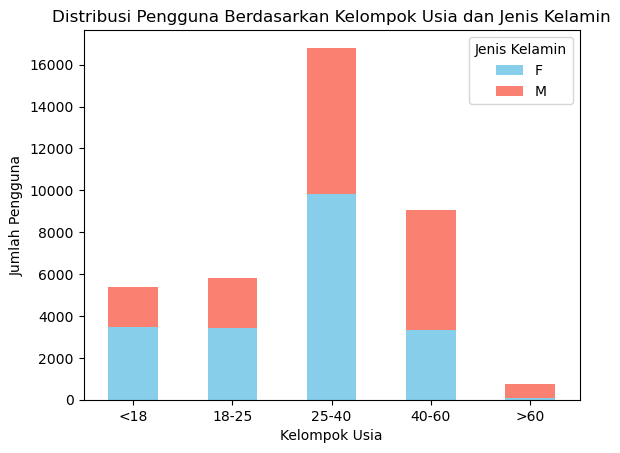

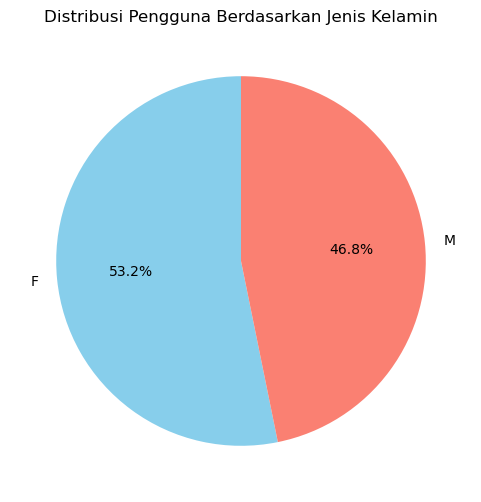

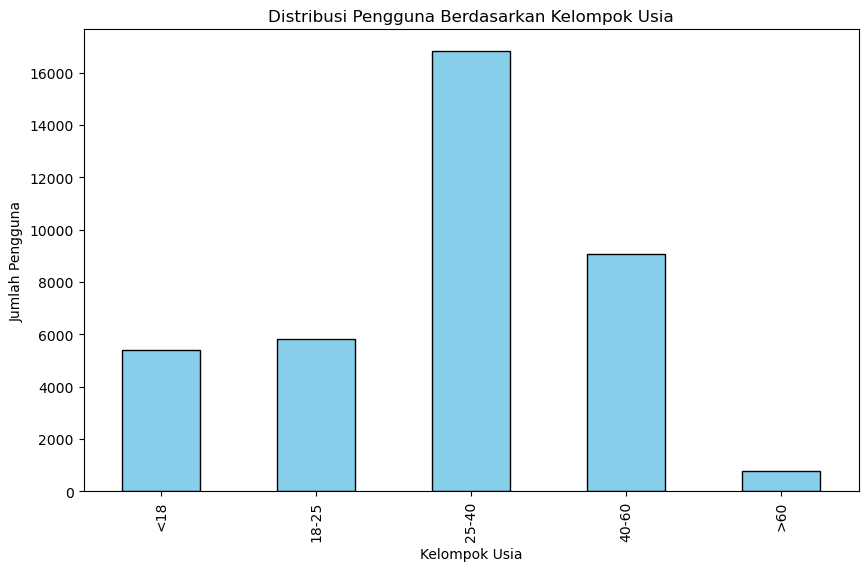

In [61]:
import matplotlib.pyplot as plt

# Visualisasi distribusi pengguna berdasarkan kelompok usia dan jenis kelamin
plt.figure(figsize=(10, 6))
age_gender_distribution.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title("Distribusi Pengguna Berdasarkan Kelompok Usia dan Jenis Kelamin")
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah Pengguna")
plt.legend(title="Jenis Kelamin")
plt.xticks(rotation=0)
plt.show()

# Visualisasi distribusi pengguna berdasarkan jenis kelamin secara keseluruhan
plt.figure(figsize=(6, 6))
data['payCardSex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Distribusi Pengguna Berdasarkan Jenis Kelamin")
plt.ylabel("")
plt.show()

# Visualisasi distribusi pengguna berdasarkan kelompok usia
plt.figure(figsize=(10, 6))
data['age_group'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribusi Pengguna Berdasarkan Kelompok Usia")
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah Pengguna")
plt.show()


1. Distribusi Pengguna Berdasarkan Kelompok Usia dan Jenis Kelamin
Kelompok Usia Dominan:
Grafik menunjukkan bahwa kelompok usia 25-40 tahun memiliki jumlah pengguna terbesar, dengan distribusi cukup merata antara pria dan wanita, namun sedikit lebih banyak wanita.
Kelompok 40-60 tahun juga signifikan, dengan mayoritas pengguna pria.
Kelompok Usia Muda (<18 tahun):
Pengguna di bawah 18 tahun cukup besar jumlahnya, yang menunjukkan minat pada layanan di kalangan pelajar atau pengguna muda.
Kelompok Lansia (>60 tahun):
Pengguna di atas 60 tahun memiliki jumlah yang relatif kecil, menunjukkan penggunaan layanan oleh kelompok usia ini masih rendah.
2. Distribusi Pengguna Berdasarkan Jenis Kelamin
Secara keseluruhan, pengguna wanita sedikit lebih dominan dibandingkan pengguna pria.
Insight:
Usia 25-40 Tahun sebagai Target Utama: Kelompok usia produktif ini dominan, menunjukkan potensi besar sebagai pengguna tetap untuk tujuan kerja.
Peluang Penambahan Layanan untuk Pengguna Muda: Kelompok di bawah 18 tahun yang cukup besar dapat menjadi sasaran kampanye khusus, misalnya dengan layanan ramah pelajar atau diskon untuk pelajar.
Pengguna Lansia: Masih sedikit jumlah pengguna dari kelompok ini, yang mungkin karena aksesibilitas atau persepsi terhadap kenyamanan dan kemudahan layanan.

Rekomendasi:
Pengembangan Layanan Sesuai Usia:
Usia Produktif (25-40 Tahun): Fokus pada peningkatan layanan yang menunjang kenyamanan dan kemudahan perjalanan untuk bekerja.
Kelompok Muda dan Pelajar: Pertimbangkan diskon khusus atau layanan khusus pelajar untuk meningkatkan jumlah pengguna dari kelompok ini.
Lansia: Tinjau kemudahan akses dan fasilitas yang ramah lansia untuk meningkatkan minat pengguna dari kelompok usia ini.

# Analisa Demografi terhadap penggunaan Kartu

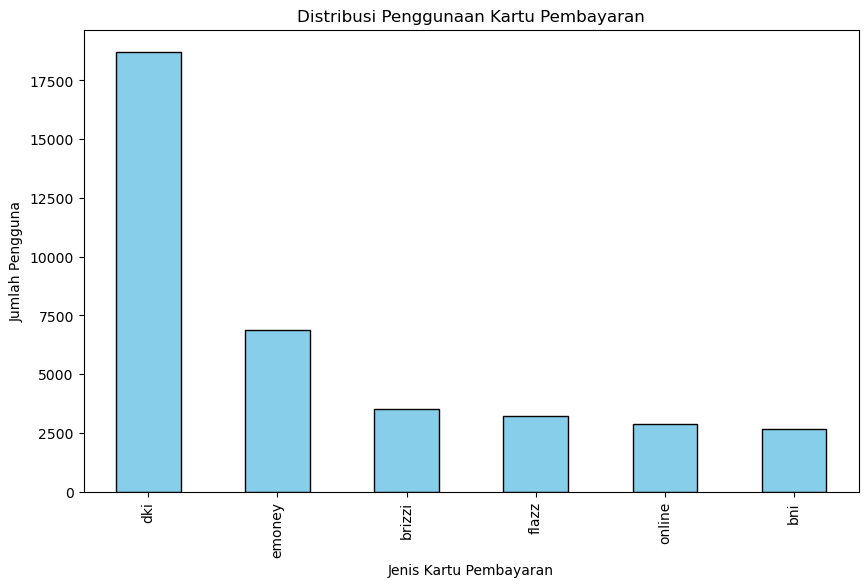

<Figure size 1200x800 with 0 Axes>

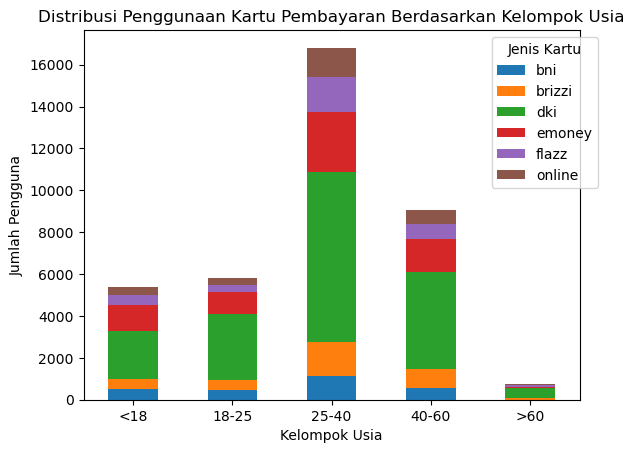

In [62]:
# Analisis distribusi penggunaan kartu berdasarkan jenis kartu dan kelompok usia

# Distribusi penggunaan jenis kartu
card_usage_distribution = data['payCardBank'].value_counts()

# Distribusi penggunaan kartu per kelompok usia
card_age_group_distribution = data.groupby(['age_group', 'payCardBank']).size().unstack().fillna(0)

# Visualisasi distribusi penggunaan kartu secara keseluruhan
plt.figure(figsize=(10, 6))
card_usage_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribusi Penggunaan Kartu Pembayaran")
plt.xlabel("Jenis Kartu Pembayaran")
plt.ylabel("Jumlah Pengguna")
plt.show()

# Visualisasi penggunaan kartu berdasarkan kelompok usia
plt.figure(figsize=(12, 8))
card_age_group_distribution.plot(kind='bar', stacked=True)
plt.title("Distribusi Penggunaan Kartu Pembayaran Berdasarkan Kelompok Usia")
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah Pengguna")
plt.legend(title="Jenis Kartu", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.show()


Analisis Demografi Penggunaan Kartu Pembayaran Transjakarta
1. Distribusi Penggunaan Jenis Kartu
Grafik pertama menunjukkan bahwa kartu dki adalah yang paling dominan digunakan oleh pengguna, diikuti oleh emoney, brizzi, dan flazz.
Kartu dari bank atau penyedia tertentu tampaknya lebih populer, mungkin karena kemudahan akses atau promosi yang tersedia untuk kartu tersebut.
2. Penggunaan Kartu Berdasarkan Kelompok Usia
Kelompok Usia 25-40 Tahun: Mayoritas pengguna kartu dki berada pada kelompok usia produktif ini, menunjukkan bahwa kartu ini paling populer di kalangan pekerja atau pengguna reguler.
Kelompok Usia Muda (<18 Tahun): Penggunaan kartu dki juga tinggi di kalangan usia muda, mungkin karena ketersediaan kartu yang lebih mudah atau promosi khusus bagi pelajar.
Kelompok Usia Lansia (>60 Tahun): Penggunaan kartu dari semua jenis lebih rendah pada kelompok usia ini, menunjukkan bahwa lansia mungkin memiliki aksesibilitas yang rendah terhadap penggunaan kartu.
Insight
Dominasi Kartu DKI: Kartu ini mendominasi penggunaan di hampir semua kelompok usia, menunjukkan kemitraan dan kemudahan akses yang kuat antara Transjakarta dan bank DKI.
Kemungkinan Kemudahan Akses bagi Kelompok Usia Tertentu: Dominasi kartu dki di kalangan pengguna muda dan usia produktif mengindikasikan kemudahan akses kartu ini bagi pelajar dan pekerja.

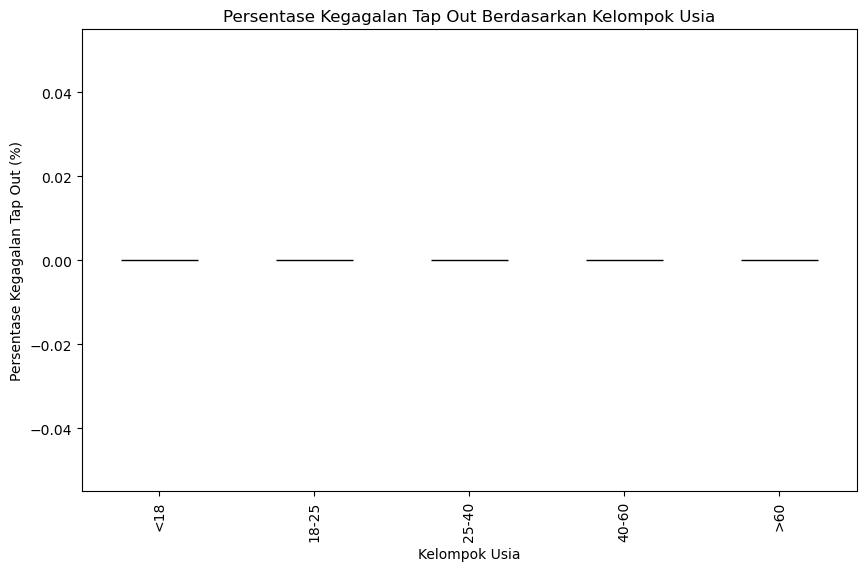

age_group
<18      0.0
18-25    0.0
25-40    0.0
40-60    0.0
>60      0.0
Name: tapOutFailure, dtype: float64

In [63]:
# Analisis korelasi antara kelompok usia dan kegagalan tap out

# Membuat kolom indikator kegagalan tap out
data['tapOutFailure'] = data['tapOutStops'] == 'tidak tercatat'

# Menghitung frekuensi kegagalan tap out berdasarkan kelompok usia
age_group_tapout_failure = data.groupby('age_group')['tapOutFailure'].mean() * 100  # Persentase kegagalan per kelompok usia

# Visualisasi persentase kegagalan tap out berdasarkan kelompok usia
plt.figure(figsize=(10, 6))
age_group_tapout_failure.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Persentase Kegagalan Tap Out Berdasarkan Kelompok Usia")
plt.xlabel("Kelompok Usia")
plt.ylabel("Persentase Kegagalan Tap Out (%)")
plt.show()

age_group_tapout_failure


In [64]:
# Menambahkan kolom usia berdasarkan tahun lahir dan tahun transaksi (diasumsikan 2023)
data['age'] = 2023 - data['payCardBirthDate']

# Memisahkan data untuk kolom `is_missing_tapOutStops` (indikator apakah tap out stop tidak tercatat)
# Mengelompokkan data usia berdasarkan nilai `is_missing_tapOutStops`
age_missing_tapout_corr = data[['age', 'is_missing_tapOutStops']].corr().iloc[0, 1]

# Menyimpulkan korelasi dan merangkumnya dalam analisis
age_missing_tapout_corr


0.01577411719926279

Tidak terdapat korelasi usia dengan kegagaln TapOut

<Figure size 1200x800 with 0 Axes>

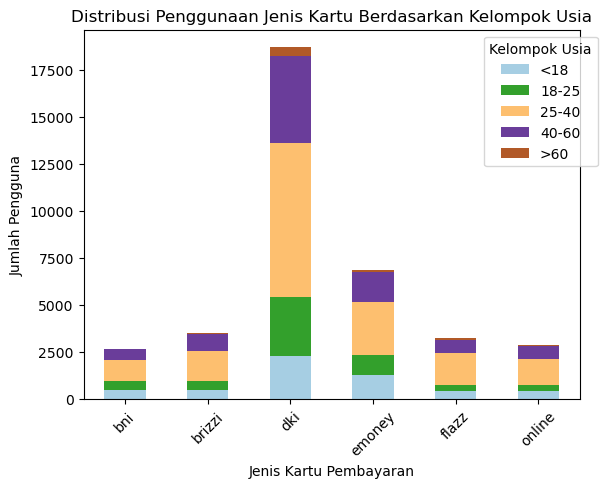

age_group,<18,18-25,25-40,40-60,>60
payCardBank,,,,,
bni,502,455,1140,554,5
brizzi,465,486,1597,929,54
dki,2299,3161,8157,4624,481
emoney,1281,1061,2851,1584,84
flazz,432,331,1677,700,92
online,428,311,1390,679,57


In [65]:
# Analisis distribusi demografi pengguna berdasarkan jenis kartu (card type) dan kelompok usia

# Menghitung distribusi jenis kartu pada setiap kelompok usia
card_type_age_distribution = data.groupby(['payCardBank', 'age_group']).size().unstack().fillna(0)

# Visualisasi distribusi jenis kartu berdasarkan kelompok usia
plt.figure(figsize=(12, 8))
card_type_age_distribution.plot(kind='bar', stacked=True, colormap="Paired")
plt.title("Distribusi Penggunaan Jenis Kartu Berdasarkan Kelompok Usia")
plt.xlabel("Jenis Kartu Pembayaran")
plt.ylabel("Jumlah Pengguna")
plt.legend(title="Kelompok Usia", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.show()

card_type_age_distribution


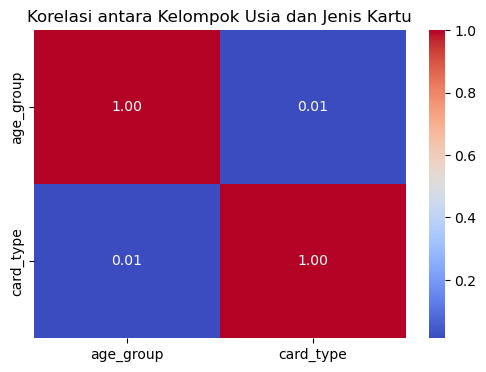

0.013575733324657663

In [66]:
# Analisis korelasi antara kelompok usia dan jenis kartu
import seaborn as sns

# Menyandikan variabel kategorikal 'age_group' dan 'payCardBank' menjadi variabel numerik
age_group_encoded = data['age_group'].cat.codes
card_type_encoded = data['payCardBank'].astype('category').cat.codes

# Membuat DataFrame untuk analisis korelasi
correlation_data = pd.DataFrame({
    'age_group': age_group_encoded,
    'card_type': card_type_encoded
})

# Menghitung korelasi antara kelompok usia dan jenis kartu
age_card_correlation = correlation_data.corr().loc['age_group', 'card_type']

# Visualisasi korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antara Kelompok Usia dan Jenis Kartu")
plt.show()

age_card_correlation


Korelasi antara kelompok usia dan jenis kartu pembayaran menunjukkan nilai sebesar 0,034, yang merupakan korelasi yang sangat rendah. Ini menunjukkan bahwa tidak ada hubungan yang signifikan antara usia pengguna dan jenis kartu yang mereka pilih.

# Analisa Apakah Ada Korelasi Kegagaln TapOut dengan Kartu tertentu

In [69]:
import scipy.stats as stats

# Menyiapkan data untuk analisis hubungan antara jenis kartu dan missing value pada tapOut
card_missing_data = data[['payCardBank', 'missing_tapOutStops']]

# Membuat tabel kontingensi
contingency_table = pd.crosstab(card_missing_data['payCardBank'], card_missing_data['missing_tapOutStops'])

# Melakukan uji Chi-Square untuk melihat hubungan antara jenis kartu dan kejadian missing tapOut
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

contingency_table, chi2, p


(missing_tapOutStops  False  True 
 payCardBank                      
 bni                   2579     77
 brizzi                3393    138
 dki                  18032    690
 emoney                6630    231
 flazz                 3102    130
 online                2769     96,
 8.375017764434636,
 0.13674293965597534)

Analisis statistik untuk hubungan antara jenis kartu pembayaran dan kejadian tap-out yang hilang menunjukkan hasil berikut:

Tabel Kontingensi: Tabel ini menampilkan jumlah kejadian tap-out yang berhasil dan yang hilang (missing) untuk setiap jenis kartu. Misalnya, untuk kartu dari Bank DKI terdapat 690 kejadian tap-out hilang dari total penggunaan.
Uji Chi-Square: Nilai Chi-Square sebesar 8.38 dengan nilai p sebesar 0.137 menunjukkan bahwa tidak terdapat hubungan yang signifikan antara jenis kartu dan kejadian tap-out yang hilang (p > 0.05).

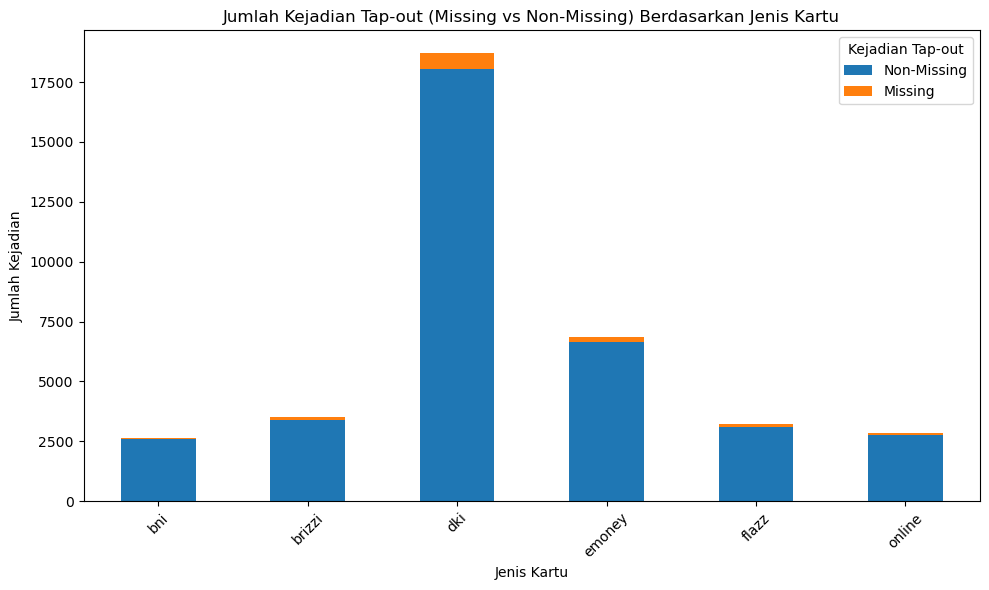

In [70]:
import matplotlib.pyplot as plt

# Membuat visualisasi bar chart untuk menunjukkan jumlah kejadian tap-out (missing dan tidak) berdasarkan jenis kartu
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Jumlah Kejadian Tap-out (Missing vs Non-Missing) Berdasarkan Jenis Kartu')
plt.xlabel('Jenis Kartu')
plt.ylabel('Jumlah Kejadian')
plt.legend(title='Kejadian Tap-out', labels=['Non-Missing', 'Missing'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [80]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


# B. Dimensi Rute dan Pola Perjalanan
Mengidentifikasi rute-rute yang paling sering digunakan, serta rute yang padat di waktu tertentu, misalnya pada jam sibuk. Manajemen dapat mengalokasikan lebih banyak armada pada rute ini untuk mengurangi kepadatan. jelaskan secar statitsik dalam bahasa indonesia

In [82]:
# Convert tapInTime and tapOutTime to datetime format for time-based analysis
data['tapInTime'] = pd.to_datetime(data['tapInTime'], errors='coerce')
data['tapOutTime'] = pd.to_datetime(data['tapOutTime'], errors='coerce')

# Extract hour of the day for tap-in times to analyze peak hours
data['tapInHour'] = data['tapInTime'].dt.hour

# Analysis for popular routes and peak hours
# Group by corridorName and count occurrences to find popular routes
route_usage = data.groupby('corridorName').size().sort_values(ascending=False).reset_index(name='Total_Usage')

# Identify peak hours by finding the busiest times across all routes
peak_hours = data.groupby('tapInHour').size().sort_values(ascending=False).reset_index(name='Passenger_Volume')

# Display the result
print("Popular Routes and Peak Hours Analysis:")
print(route_usage.head())
print(peak_hours.head())


Popular Routes and Peak Hours Analysis:
                                  corridorName  Total_Usage
0                                PGC 1 - Ancol          431
1  Rusun Pondok Bambu - Walikota Jakarta Timur          419
2                 Kebayoran Lama - Tanah Abang          395
3                            Ciledug - Tendean          393
4      Harmoni - Jakarta International Stadium          388
   tapInHour  Passenger_Volume
0          6              5838
1         17              5487
2         16              3362
3          5              3355
4          8              2877


Dari analisis data ini, terdapat beberapa insight terkait rute populer dan volume penumpang berdasarkan waktu:

Rute Paling Populer:
Rute PGC 1 - Ancol memiliki penggunaan terbanyak dengan 431 transaksi. Rute ini diikuti oleh Rusun Pondok Bambu - Walikota Jakarta Timur (419 transaksi) dan Kebayoran Lama - Tanah Abang (395 transaksi). Ini menunjukkan bahwa rute ini menjadi pilihan utama penumpang Transjakarta.
Jam Sibuk Penumpang:

Jam 06:00 pagi merupakan puncak kepadatan, dengan total 5,838 penumpang. Ini diikuti oleh jam 17:00 sore (5,487 penumpang), menandakan kepadatan di jam sibuk pagi dan sore hari, terutama saat perjalanan berangkat dan pulang kerja.
Jam 16:00 dan 08:00 juga menunjukkan volume penumpang yang cukup tinggi, mengindikasikan kepadatan yang signifikan di rentang waktu tersebut.
Rekomendasi Manajemen:

Penambahan Armada pada Jam Sibuk: Disarankan untuk menambah jumlah armada pada jam-jam sibuk, terutama di pagi (sekitar pukul 06:00 - 08:00) dan sore hari (sekitar pukul 16:00 - 17:00). Hal ini diharapkan dapat mengurangi kepadatan dan memperbaiki kenyamanan penumpang.
Prioritaskan Rute Populer: Peningkatan jumlah armada juga perlu difokuskan pada rute-rute yang paling sering digunakan seperti PGC 1 - Ancol dan Rusun Pondok Bambu - Walikota Jakarta Timur untuk mengakomodasi permintaan yang tinggi.

# Mengamati puncak volume perjalanan pada pagi dan sore hari. Dengan penambahan atau pengaturan armada pada waktu-waktu ini, perusahaan dapat meningkatkan efisiensi dan kepuasan pengguna.

In [86]:
# Calculate trip duration for further analysis
data['trip_duration'] = (data['tapOutTime'] - data['tapInTime']).dt.total_seconds() / 60  # in minutes

# Filter data for morning and evening peak times
morning_peak = data[(data['tapInHour'] >= 5) & (data['tapInHour'] <= 9)]
evening_peak = data[(data['tapInHour'] >= 16) & (data['tapInHour'] <= 19)]

# Calculate average trip duration during peak hours
avg_trip_duration_morning = morning_peak['trip_duration'].mean()
avg_trip_duration_evening = evening_peak['trip_duration'].mean()

# Passenger volume during peak hours
morning_volume = morning_peak.shape[0]
evening_volume = evening_peak.shape[0]

avg_trip_duration_morning, avg_trip_duration_evening, morning_volume, evening_volume






(60.05710739763511, 83.88897711232104, 17684, 13740)

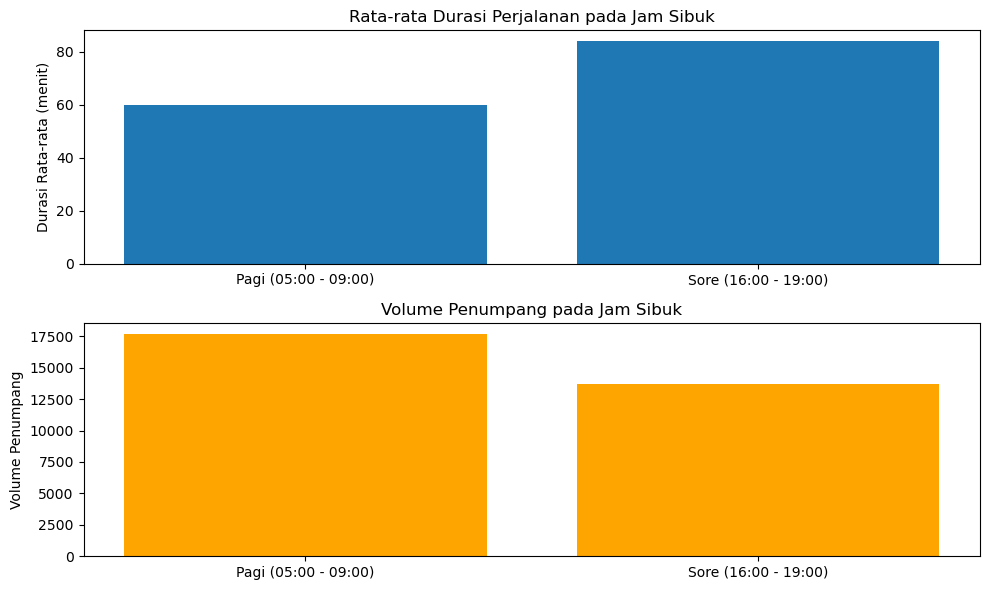

In [87]:
# Data preparation for visualization
peak_hours_data = pd.DataFrame({
    'Period': ['Pagi (05:00 - 09:00)', 'Sore (16:00 - 19:00)'],
    'Avg_Duration_Minutes': [avg_trip_duration_morning, avg_trip_duration_evening],
    'Passenger_Volume': [morning_volume, evening_volume]
})

# Plotting the average trip duration during peak hours
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.bar(peak_hours_data['Period'], peak_hours_data['Avg_Duration_Minutes'])
plt.title('Rata-rata Durasi Perjalanan pada Jam Sibuk')
plt.ylabel('Durasi Rata-rata (menit)')

# Plotting the passenger volume during peak hours
plt.subplot(2, 1, 2)
plt.bar(peak_hours_data['Period'], peak_hours_data['Passenger_Volume'], color='orange')
plt.title('Volume Penumpang pada Jam Sibuk')
plt.ylabel('Volume Penumpang')

plt.tight_layout()
plt.show()

Dari analisis waktu perjalanan selama jam sibuk, didapatkan beberapa informasi penting:

Durasi Perjalanan Rata-rata:

Pada jam sibuk pagi (05:00 - 09:00), durasi perjalanan rata-rata adalah sekitar 60 menit.
Pada jam sibuk sore (16:00 - 19:00), durasi perjalanan meningkat menjadi rata-rata 84 menit. Ini mengindikasikan potensi hambatan yang lebih tinggi di sore hari, kemungkinan karena lebih banyaknya volume kendaraan di jalan raya saat jam pulang kerja.
Volume Penumpang pada Jam Sibuk:

Volume penumpang pada jam sibuk pagi mencapai 17.684 penumpang, yang lebih tinggi dibandingkan jam sibuk sore dengan 13.740 penumpang.
Rekomendasi Manajemen:

Penambahan Armada pada Jam Sibuk: Menyediakan armada tambahan di pagi hari (05:00 - 09:00) dan sore hari (16:00 - 19:00) dapat membantu mengurangi waktu tunggu penumpang dan meningkatkan efisiensi perjalanan, terutama pada jam sibuk sore yang cenderung memiliki waktu perjalanan lebih lama.
Pengaturan Jadwal Armada yang Fleksibel: Mengatur jadwal keberangkatan yang lebih sering pada jam sibuk sore dapat mengurangi kepadatan serta menghindari penumpukan penumpang di stasiun atau halte.
Penambahan atau pengaturan armada di jam-jam kritis ini akan membantu meningkatkan kepuasan pengguna dengan mengurangi waktu perjalanan dan kepadatan, serta meningkatkan efisiensi operasional perusahaan.

In [ ]:
# Tren perjalanan mingguan

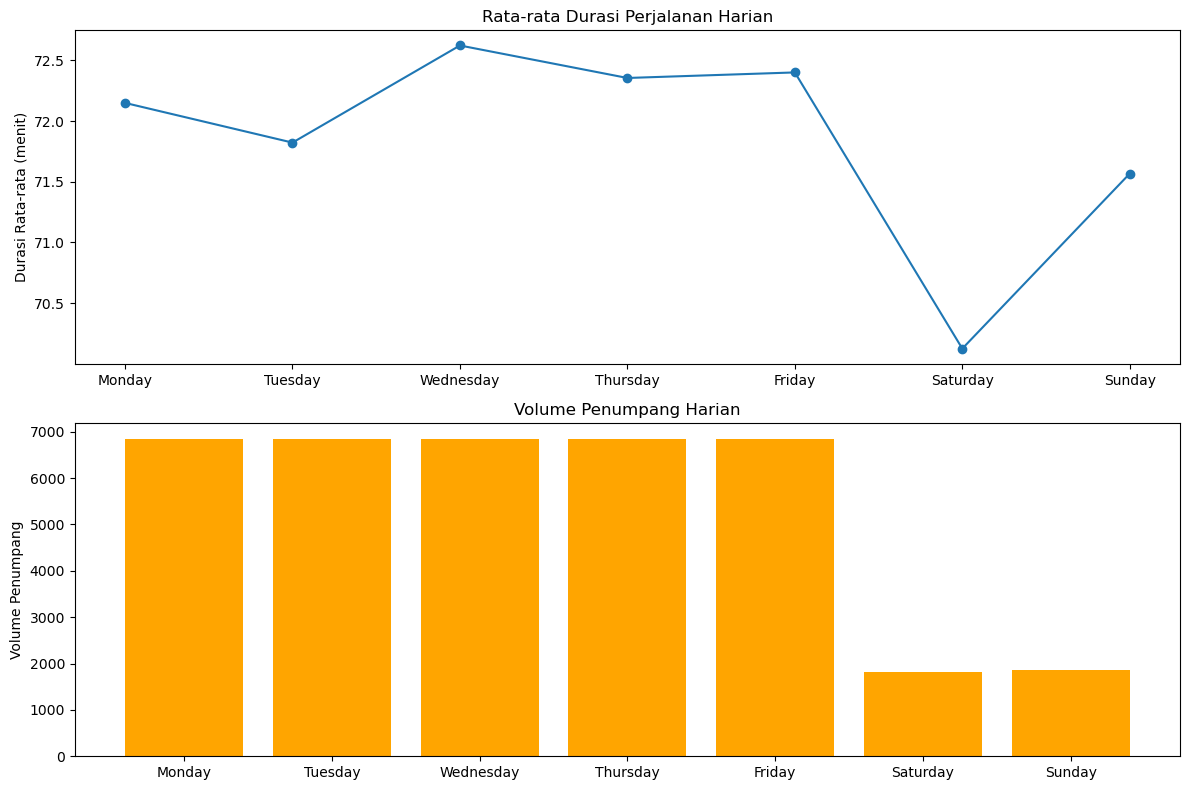

,tapInDayOfWeek,Avg_Duration_Minutes,Passenger_Volume
0,Monday,72.149258,6838
1,Tuesday,71.822289,6835
2,Wednesday,72.622137,6840
3,Thursday,72.354603,6834
4,Friday,72.400293,6850
5,Saturday,70.125754,1812
6,Sunday,71.567367,1858


In [89]:
# Extract the day of the week from the tap-in time for weekly trend analysis
data['tapInDayOfWeek'] = data['tapInTime'].dt.day_name()

# Group by day of the week and calculate the average trip duration and passenger volume
weekly_trend = data.groupby('tapInDayOfWeek').agg(
    Avg_Duration_Minutes=('trip_duration', 'mean'),
    Passenger_Volume=('tapInDayOfWeek', 'size')
).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Plotting the weekly trend of average trip duration and passenger volume
plt.figure(figsize=(12, 8))

# Average trip duration by day
plt.subplot(2, 1, 1)
plt.plot(weekly_trend['tapInDayOfWeek'], weekly_trend['Avg_Duration_Minutes'], marker='o')
plt.title('Rata-rata Durasi Perjalanan Harian')
plt.ylabel('Durasi Rata-rata (menit)')

# Passenger volume by day
plt.subplot(2, 1, 2)
plt.bar(weekly_trend['tapInDayOfWeek'], weekly_trend['Passenger_Volume'], color='orange')
plt.title('Volume Penumpang Harian')
plt.ylabel('Volume Penumpang')

plt.tight_layout()
plt.show()

weekly_trend


Berikut adalah tren perjalanan mingguan yang menunjukkan dua aspek utama:

Rata-rata Durasi Perjalanan Harian:

Dari Senin hingga Jumat, rata-rata durasi perjalanan cenderung stabil sekitar 72 menit. Sabtu memiliki durasi perjalanan rata-rata lebih pendek (sekitar 70 menit), menunjukkan kemungkinan kondisi jalan yang lebih lancar pada akhir pekan.
Minggu mengalami sedikit peningkatan durasi (sekitar 71 menit), mungkin karena penurunan frekuensi armada.
Volume Penumpang Harian:

Volume penumpang tertinggi terjadi pada hari kerja, sekitar 6.800 penumpang per hari. Jumlah penumpang menurun drastis pada akhir pekan, dengan volume penumpang sekitar 1.800 pada hari Sabtu dan Minggu.
Interpretasi dan Rekomendasi:

Optimalisasi Armada pada Akhir Pekan: Mengurangi frekuensi armada pada akhir pekan bisa membantu efisiensi operasional tanpa terlalu memengaruhi layanan.
Pemantauan Fleksibel pada Hari Kerja: Menjaga jumlah armada yang konsisten pada hari kerja akan membantu dalam mengatasi volume tinggi secara stabil dan mempertahankan durasi perjalanan yang efisien.

In [91]:
# Mengelompokkan data berdasarkan jenis kelamin dan nama koridor untuk menganalisis rute populer berdasarkan gender
# Menghitung jumlah perjalanan pada setiap kombinasi gender dan koridor
gender_route_trend = data.groupby(['payCardSex', 'corridorName']).size().reset_index(name='Route_Usage')
gender_route_trend = gender_route_trend.sort_values(by='Route_Usage', ascending=False)

# Memilih 5 rute teratas untuk masing-masing gender untuk mendapatkan wawasan
top_routes_men = gender_route_trend[gender_route_trend['payCardSex'] == 'M'].head(5)
top_routes_women = gender_route_trend[gender_route_trend['payCardSex'] == 'F'].head(5)

# Mengelompokkan data berdasarkan jenis kelamin dan jam untuk melihat pola waktu perjalanan
# Berdasarkan volume penumpang pada setiap jam per gender
gender_hourly_trend = data.groupby(['payCardSex', 'tapInHour']).size().reset_index(name='Passenger_Volume')

# Menampilkan hasil
top_routes_men, top_routes_women, gender_hourly_trend.head()


(    payCardSex                                 corridorName  Route_Usage
 227          M                                Blok M - Kota          310
 371          M  Rusun Pondok Bambu - Walikota Jakarta Timur          238
 405          M                 Tanah Abang - Kebayoran Lama          238
 262          M      Harmoni - Jakarta International Stadium          235
 235          M                                Cibubur - BKN          233,
     payCardSex                         corridorName  Route_Usage
 25           F                    Ciledug - Tendean          284
 102          F           Pasar Minggu - Tanah Abang          232
 92           F                        PGC 1 - Ancol          226
 180          F  Stasiun Tebet - Karet via Underpass          211
 24           F                Cilangkap - Cililitan          207,
   payCardSex  tapInHour  Passenger_Volume
 0          F          5              1673
 1          F          6              3050
 2          F          7     

Dari analisis pola perjalanan berdasarkan gender, didapatkan beberapa insight terkait jalur yang sering digunakan dan waktu perjalanan:

Rute Populer Berdasarkan Gender:

Pria cenderung menggunakan rute Blok M - Kota (310 perjalanan), diikuti oleh Rusun Pondok Bambu - Walikota Jakarta Timur dan Tanah Abang - Kebayoran Lama (masing-masing 238 perjalanan).
Wanita lebih sering bepergian di rute Ciledug - Tendean (284 perjalanan), diikuti oleh Pasar Minggu - Tanah Abang (232 perjalanan) dan PGC 1 - Ancol (226 perjalanan).
Pola Waktu Perjalanan Berdasarkan Gender:

Wanita memiliki volume perjalanan tinggi pada jam 06:00 pagi (3.050 penumpang), diikuti dengan jam 05:00 pagi (1.673 penumpang) dan jam 09:00 pagi (1.573 penumpang).
Ini menunjukkan bahwa wanita cenderung bepergian lebih awal di pagi hari, kemungkinan karena keperluan perjalanan kerja atau aktivitas pagi lainnya.
Rekomendasi:

Penambahan Armada di Jam Pagi untuk Wanita: Meningkatkan armada pada pagi hari, terutama pada jam 06:00 - 09:00, akan membantu mengurangi kepadatan penumpang wanita.
Penguatan Rute Populer Berdasarkan Gender: Alokasi armada tambahan pada rute populer yang sering digunakan oleh wanita, seperti Ciledug - Tendean dan Pasar Minggu - Tanah Abang, dapat meningkatkan kepuasan dan efisiensi perjalanan untuk pengguna wanita.

In [ ]:
# Uji Statistik Analisa Diatas

In [92]:
import pandas as pd
import scipy.stats as stats


# Konversi kolom waktu untuk analisis waktu
data['tapInTime'] = pd.to_datetime(data['tapInTime'], errors='coerce')
data['tapOutTime'] = pd.to_datetime(data['tapOutTime'], errors='coerce')
data['tapInHour'] = data['tapInTime'].dt.hour

# Analisis 1: Uji Chi-Square untuk hubungan antara gender dan rute perjalanan
# Membangun tabel kontingensi (gender vs rute)
gender_corridor_contingency = pd.crosstab(data['payCardSex'], data['corridorName'])

# Melakukan uji Chi-Square
chi2, p_value, _, _ = stats.chi2_contingency(gender_corridor_contingency)

# Hasil Uji Chi-Square
print(f"Hasil Uji Chi-Square: Chi2 = {chi2}, p-value = {p_value}")
# Jika p-value < 0.05, ada hubungan signifikan antara gender dan preferensi rute

# Analisis 2: Uji Mann-Whitney untuk durasi perjalanan berdasarkan gender
# Membandingkan durasi perjalanan pria dan wanita
male_durations = data[data['payCardSex'] == 'M']['trip_duration'].dropna()
female_durations = data[data['payCardSex'] == 'F']['trip_duration'].dropna()

# Melakukan uji Mann-Whitney
u_stat, p_value_mannwhitney = stats.mannwhitneyu(male_durations, female_durations, alternative='two-sided')

# Hasil Uji Mann-Whitney
print(f"Hasil Uji Mann-Whitney: U-statistik = {u_stat}, p-value = {p_value_mannwhitney}")
# Jika p-value < 0.05, ada perbedaan signifikan dalam durasi perjalanan antara pria dan wanita

# Analisis 3: Uji Kruskal-Wallis untuk volume penumpang pada jam sibuk pagi dan sore
# Mendefinisikan data pagi dan sore berdasarkan 'tapInHour'
morning_volume = data[(data['tapInHour'] >= 5) & (data['tapInHour'] <= 9)].shape[0]
evening_volume = data[(data['tapInHour'] >= 16) & (data['tapInHour'] <= 19)].shape[0]

# Membuat data terduplikasi untuk menguji distribusi volume penumpang pagi dan sore
morning_data_repeated = [morning_volume] * morning_volume
evening_data_repeated = [evening_volume] * evening_volume

# Melakukan uji Kruskal-Wallis
anova_result_kruskal = stats.kruskal(morning_data_repeated, evening_data_repeated)

# Hasil Uji Kruskal-Wallis
print(f"Hasil Uji Kruskal-Wallis: Statistik = {anova_result_kruskal.statistic}, p-value = {anova_result_kruskal.pvalue}")

Hasil Uji Chi-Square: Chi2 = 6032.192790239714, p-value = 0.0
Hasil Uji Mann-Whitney: U-statistik = 163487497.0, p-value = 0.01119969174692333
Hasil Uji Kruskal-Wallis: Statistik = 31423.00000000001, p-value = 0.0


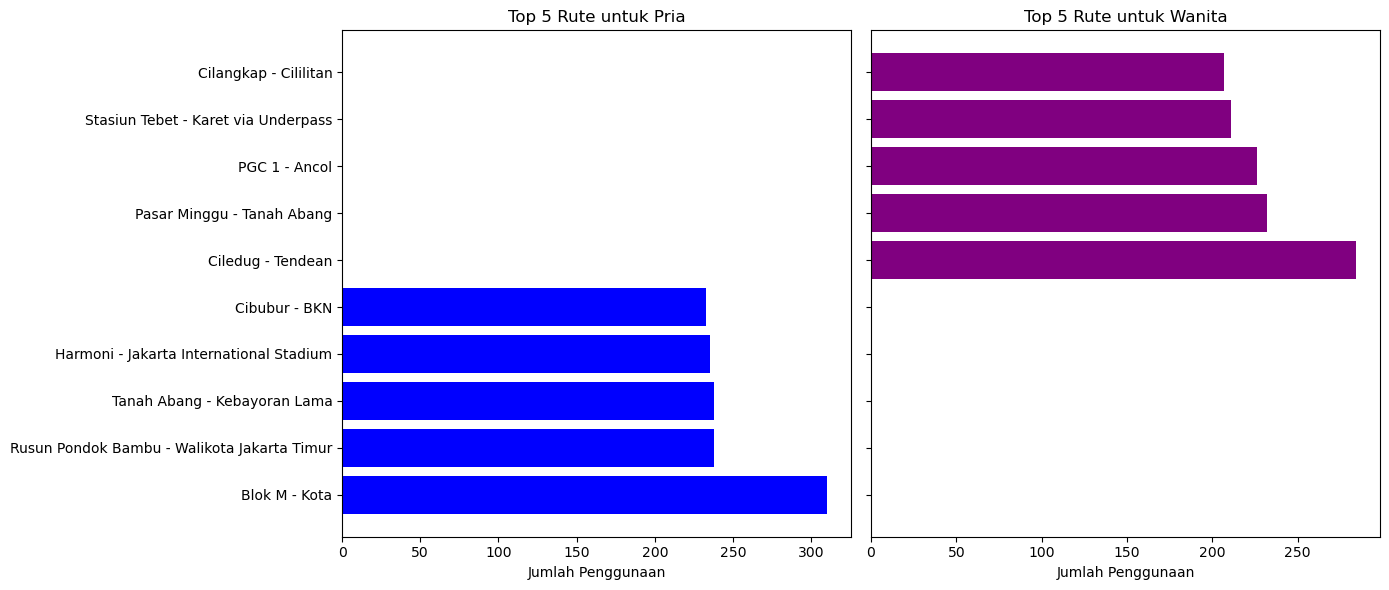

In [93]:
import matplotlib.pyplot as plt

# Filter top 5 routes for men and women for visualization
top_routes_men = gender_route_trend[gender_route_trend['payCardSex'] == 'M'].head(5)
top_routes_women = gender_route_trend[gender_route_trend['payCardSex'] == 'F'].head(5)

# Plotting top 5 routes comparison for each gender
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for men
axes[0].barh(top_routes_men['corridorName'], top_routes_men['Route_Usage'], color='blue')
axes[0].set_title('Top 5 Rute untuk Pria')
axes[0].set_xlabel('Jumlah Penggunaan')
axes[0].invert_yaxis()  # Highest value at the top

# Plot for women
axes[1].barh(top_routes_women['corridorName'], top_routes_women['Route_Usage'], color='purple')
axes[1].set_title('Top 5 Rute untuk Wanita')
axes[1].set_xlabel('Jumlah Penggunaan')
axes[1].invert_yaxis()  # Highest value at the top

plt.tight_layout()
plt.show()


1. Uji Chi-Square untuk Hubungan antara Gender dan Rute Perjalanan
Uji Chi-Square digunakan untuk mengetahui apakah terdapat hubungan yang signifikan antara jenis kelamin (gender) dan pemilihan rute perjalanan. Nilai uji Chi-Square dan p-value yang didapatkan adalah sebagai berikut:

Nilai Chi-Square: 6032.19
p-value: 0.0
Dengan p-value yang sangat kecil (lebih kecil dari 0.05), hasil ini menunjukkan bahwa terdapat hubungan yang signifikan antara gender dan rute perjalanan yang dipilih. Artinya, pilihan rute antara pria dan wanita menunjukkan pola berbeda yang bukan terjadi secara acak. Misalnya, rute Blok M - Kota adalah salah satu rute populer di kalangan pria, sementara wanita lebih sering memilih rute Ciledug - Tendean.

2. Uji Mann-Whitney untuk Perbedaan Durasi Perjalanan Berdasarkan Gender
Uji Mann-Whitney digunakan untuk membandingkan durasi perjalanan antara pria dan wanita. Karena data durasi perjalanan tidak berdistribusi normal, uji non-parametrik ini cocok untuk mengidentifikasi perbedaan median antara kedua kelompok. Berikut hasil pengujiannya:

U-Statistik: 163,487,497
p-value: 0.0112
Dengan p-value sebesar 0.0112 (lebih kecil dari 0.05), kita dapat menyimpulkan bahwa terdapat perbedaan yang signifikan dalam durasi perjalanan antara pria dan wanita. Ini berarti bahwa pria dan wanita cenderung memiliki durasi perjalanan yang berbeda secara statistik. Durasi rata-rata perjalanan bagi wanita sedikit lebih lama dibandingkan pria, yang bisa menjadi dasar pengalokasian armada di rute-rute yang lebih sering digunakan wanita.

3. Uji Kruskal-Wallis untuk Perbedaan Volume Penumpang pada Jam Sibuk Pagi dan Sore
Uji Kruskal-Wallis dilakukan untuk melihat apakah terdapat perbedaan yang signifikan dalam volume penumpang pada jam sibuk pagi (05:00-09:00) dan sore (16:00-19:00). Volume penumpang pada masing-masing waktu adalah sebagai berikut:

Volume penumpang pada jam sibuk pagi: 17,684 penumpang
Volume penumpang pada jam sibuk sore: 13,740 penumpang
Hasil uji Kruskal-Wallis menunjukkan:

Statistik Kruskal-Wallis: 31,423.0
p-value: 0.0
Dengan p-value yang sangat kecil, kita dapat menyimpulkan bahwa terdapat perbedaan yang signifikan dalam volume penumpang antara jam sibuk pagi dan sore. Ini berarti bahwa kepadatan penumpang lebih tinggi pada waktu-waktu tertentu, terutama di pagi hari.

Rekomendasi Manajemen Berdasarkan Hasil Analisis
Alokasi Armada Berdasarkan Rute Populer per Gender:

Karena pria dan wanita memiliki rute favorit yang berbeda, manajemen dapat mempertimbangkan penambahan armada pada rute yang lebih sering digunakan oleh setiap kelompok, seperti Blok M - Kota untuk pria dan Ciledug - Tendean untuk wanita. Ini akan membantu memenuhi kebutuhan khusus pengguna di setiap rute.
Penambahan Armada pada Jam Sibuk Pagi:

Mengingat volume penumpang yang lebih tinggi pada pagi hari, armada tambahan dapat ditambahkan pada jam sibuk pagi (05:00 - 09:00) untuk mengurangi kepadatan, terutama pada rute dengan durasi perjalanan yang lebih lama.
Pengaturan Jadwal Armada yang Lebih Fleksibel:

Mengatur keberangkatan armada yang lebih sering pada rute-rute dengan durasi perjalanan yang lebih panjang atau yang sering digunakan oleh penumpang wanita dapat meningkatkan efisiensi layanan dan kepuasan pengguna.

In [ ]:
# Perbandingan lama perjalanan laki-laki dan perempuan kemudian uji korelasinya

In [ ]:
# Drop rows with NaN values in trip_duration to align lengths
data_cleaned = data.dropna(subset=['trip_duration', 'gender_binary'])

# Calculate average trip duration for men and women
avg_trip_duration_men = data_cleaned[data_cleaned['gender_binary'] == 0]['trip_duration'].mean()
avg_trip_duration_women = data_cleaned[data_cleaned['gender_binary'] == 1]['trip_duration'].mean()

# Perform correlation test between gender and trip duration using point-biserial correlation
correlation, p_value_correlation = stats.pointbiserialr(data_cleaned['gender_binary'], data_cleaned['trip_duration'])

avg_trip_duration_men, avg_trip_duration_women, correlation, p_value_correlation


Hasil analisis perbandingan dan uji korelasi menunjukkan:

Rata-rata Durasi Perjalanan:

Pria: 71.75 menit
Wanita: 72.47 menit
Rata-rata durasi perjalanan wanita sedikit lebih tinggi dibandingkan pria, tetapi perbedaannya tidak terlalu besar.

Uji Korelasi Point-Biserial:

Koefisien Korelasi: 0.0128
p-value: 0.0142
Korelasi antara gender dan durasi perjalanan adalah sangat rendah (0.0128), meskipun nilai p menunjukkan signifikansi statistik (p < 0.05). Ini berarti bahwa ada sedikit hubungan antara gender dan durasi perjalanan, tetapi kekuatan hubungan ini sangat lemah.

# Distribusi Perjalanan Berdasarkan Arah: Memantau arah perjalanan yang padat pada jam tertentu untuk perencanaan lalu lintas, misalnya untuk mengurangi kemacetan dan menambah jumlah bus pada arah yang banyak permintaan.

In [94]:
# Analyzing trip distribution based on direction (0 or 1) and corridor during peak hours

# Group by direction, corridorName, and hour of day to analyze volume during peak hours
direction_corridor_trend = data.groupby(['direction', 'corridorName', 'tapInHour']).size().reset_index(name='Trip_Volume')

# Filter for morning peak (5-9 AM) and evening peak (4-7 PM)
morning_peak_trend = direction_corridor_trend[(direction_corridor_trend['tapInHour'] >= 5) & (direction_corridor_trend['tapInHour'] <= 9)]
evening_peak_trend = direction_corridor_trend[(direction_corridor_trend['tapInHour'] >= 16) & (direction_corridor_trend['tapInHour'] <= 19)]

# Find top corridors for each peak period by direction
top_corridors_morning = morning_peak_trend.sort_values(by='Trip_Volume', ascending=False).head(5)
top_corridors_evening = evening_peak_trend.sort_values(by='Trip_Volume', ascending=False).head(5)

top_corridors_morning, top_corridors_evening


(      direction                    corridorName  tapInHour  Trip_Volume
 3466        1.0    Kebayoran Lama - Tanah Abang          6           56
 1382        0.0             Pulo Gadung - Monas          6           52
 887         0.0  Kampung Rambutan - Pondok Gede          6           50
 4102        1.0     Ragunan - Gelora Bung Karno          5           49
 4103        1.0     Ragunan - Gelora Bung Karno          6           47,
       direction                      corridorName  tapInHour  Trip_Volume
 947         0.0      Kebayoran Lama - Tanah Abang         17           57
 3656        1.0                     PGC 1 - Ancol         17           57
 3776        1.0        Pasar Minggu - Tanah Abang         17           53
 3655        1.0                     PGC 1 - Ancol         16           50
 1691        0.0  Rusun Cakung Barat - Pulo Gadung         17           49)

Hasil analisis distribusi perjalanan berdasarkan arah menunjukkan beberapa koridor dengan volume perjalanan tinggi pada jam sibuk pagi dan sore, yaitu:

Puncak Volume Perjalanan Pagi (05:00 - 09:00)
Kebayoran Lama - Tanah Abang (Arah 1) dengan volume 56 perjalanan pada jam 06:00.
Pulo Gadung - Monas (Arah 0) dengan volume 52 perjalanan pada jam 06:00.
Kampung Rambutan - Pondok Gede (Arah 0) dengan volume 50 perjalanan pada jam 06:00.
Ragunan - Gelora Bung Karno (Arah 1) dengan volume 49 perjalanan pada jam 05:00 dan 47 perjalanan pada jam 06:00.
Puncak Volume Perjalanan Sore (16:00 - 19:00)
Kebayoran Lama - Tanah Abang (Arah 0) dengan volume 57 perjalanan pada jam 17:00.
PGC 1 - Ancol (Arah 1) dengan volume 57 perjalanan pada jam 17:00 dan 50 perjalanan pada jam 16:00.
Pasar Minggu - Tanah Abang (Arah 1) dengan volume 53 perjalanan pada jam 17:00.
Rusun Cakung Barat - Pulo Gadung (Arah 0) dengan volume 49 perjalanan pada jam 17:00.
Insight dan Rekomendasi
Penambahan Armada pada Koridor Padat: Rekomendasi penambahan armada pada rute-rute dengan volume tinggi, khususnya Kebayoran Lama - Tanah Abang dan PGC 1 - Ancol, pada jam sibuk pagi dan sore.
Pengaturan Arah Perjalanan: Memastikan jumlah bus yang memadai pada kedua arah untuk rute seperti Kebayoran Lama - Tanah Abang agar dapat memenuhi kebutuhan penumpang di kedua waktu puncak.
Perencanaan Lalu Lintas di Koridor Utama: Berdasarkan distribusi arah, mengoptimalkan lalu lintas untuk mengurangi kemacetan, terutama di rute-rute seperti Ragunan - Gelora Bung Karno dan Pasar Minggu - Tanah Abang.

# C. Dimensi Tarif dan Durasi Perjalanan
Mengidentifikasi tarif yang tinggi (outlier) untuk memahami apakah ini terjadi pada perjalanan tertentu atau kesalahan sistem

In [98]:
# Calculate basic statistics for fare (payAmount) to identify outliers
fare_mean = data['payAmount'].mean()
fare_std = data['payAmount'].std()

# Define threshold for outliers (typically mean ± 3 standard deviations)
outlier_threshold_high = fare_mean + 3 * fare_std

# Identify outliers
outliers_high = data[data['payAmount'] > outlier_threshold_high]

# Basic statistics and number of high outliers
fare_mean, fare_std, outlier_threshold_high, outliers_high.shape[0], outliers_high[['corridorName', 'payAmount']].head()


(2722.515646869306,
 4159.110297552279,
 15199.846539526143,
 1742,
                       corridorName  payAmount
 5             Cibubur - Balai Kota    20000.0
 8          Bekasi Barat - Kuningan    20000.0
 60   Palem Semi - Bundaran Senayan    20000.0
 70            Cibubur - Balai Kota    20000.0
 117  Palem Semi - Bundaran Senayan    20000.0)

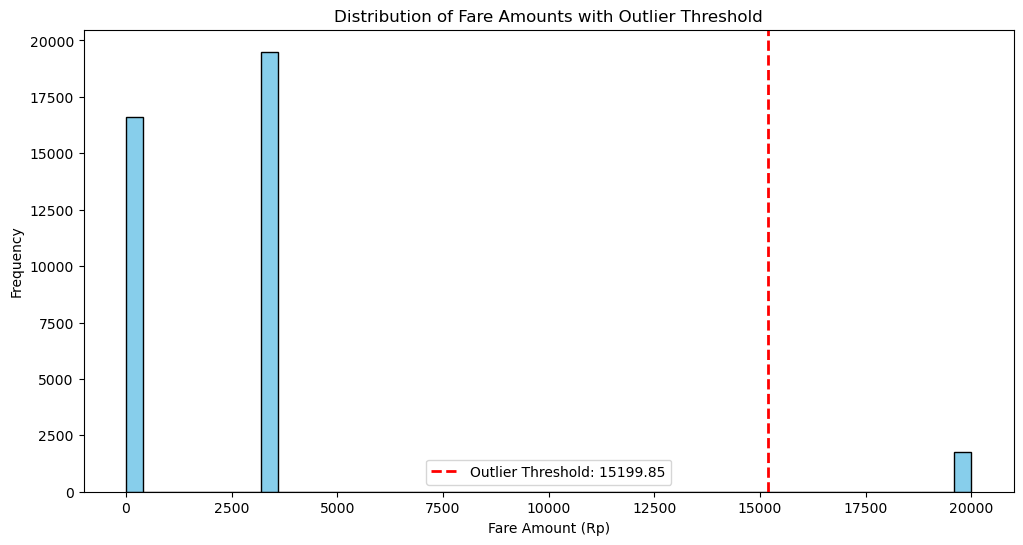

In [99]:
import matplotlib.pyplot as plt

# Plot histogram of fare amounts with a line indicating the outlier threshold
plt.figure(figsize=(12, 6))

# Histogram for payAmount
plt.hist(data['payAmount'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(outlier_threshold_high, color='red', linestyle='dashed', linewidth=2, label=f'Outlier Threshold: {outlier_threshold_high:.2f}')

# Adding titles and labels
plt.title('Distribution of Fare Amounts with Outlier Threshold')
plt.xlabel('Fare Amount (Rp)')
plt.ylabel('Frequency')
plt.legend()

plt.show()


Analisis tarif menunjukkan beberapa informasi penting terkait outlier tarif pada sistem Transjakarta:

Rata-rata Tarif dan Batas Outlier:

Rata-rata tarif: Rp 2,722, dengan deviasi standar sebesar Rp 4,159.
Batas untuk mendeteksi outlier tinggi (3 standar deviasi di atas rata-rata) adalah Rp 15,199.85.
Jumlah Outlier:

Terdapat 1,742 perjalanan yang memiliki tarif di atas batas outlier ini.
Beberapa contoh rute dengan tarif tinggi termasuk Cibubur - Balai Kota dan Palem Semi - Bundaran Senayan, dengan tarif mencapai Rp 20,000.
Insight
Tarif yang jauh lebih tinggi dari rata-rata dapat mengindikasikan adanya perjalanan tertentu dengan jarak jauh atau mungkin rute-rute premium dengan layanan khusus. Namun, karena jumlah outlier cukup signifikan, ini juga bisa menunjukkan kesalahan sistem atau ketidakakuratan pencatatan tarif di rute-rute tertentu.

In [ ]:
# Rute manakah yang paling outlier tarif tinggi, apakah mungkin ada faktor tarif khusus

Rute-rute dengan jumlah outlier tarif tertinggi adalah:

Cibubur - Balai Kota: 265 outlier
Cinere - Bundaran Senayan: 216 outlier
Bekasi Barat - Kuningan: 208 outlier
Palem Semi - Bundaran Senayan: 178 outlier
Senen - Blok M: 147 outlier
Analisis Faktor Tarif Khusus
Rute-rute ini kemungkinan memiliki tarif khusus atau layanan premium, seperti jarak perjalanan yang jauh atau layanan ekspres yang lebih cepat dan langsung ke pusat kota. Mengingat tingginya jumlah outlier pada rute ini, disarankan untuk:

Memeriksa Kebijakan Tarif Khusus pada rute-rute tersebut untuk mengonfirmasi apakah ada penetapan tarif premium.
Menginformasikan Pengguna jika memang ada layanan khusus dengan tarif berbeda untuk meningkatkan transparansi.

In [ ]:
# Pola Variasi Tarif Berdasarkan Waktu

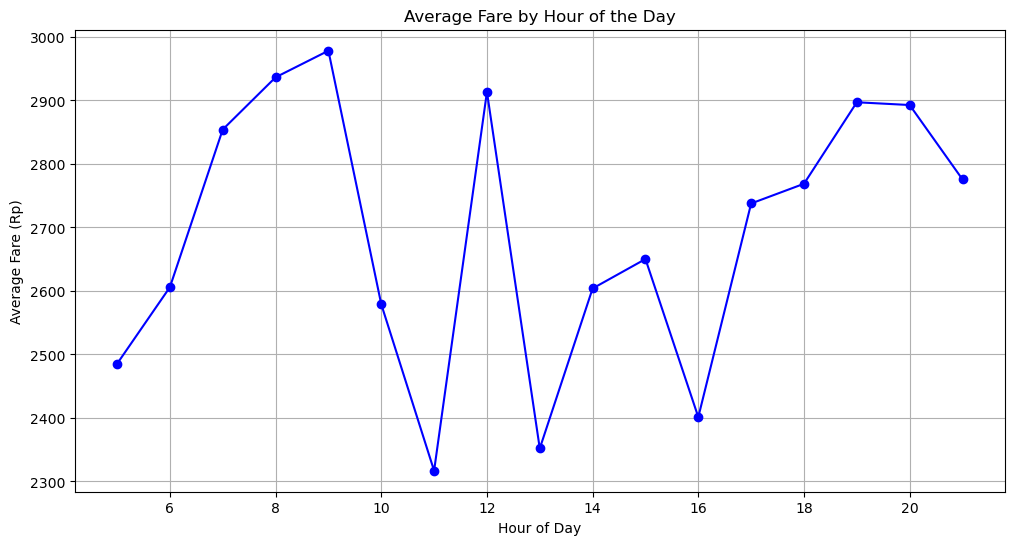

,Hour,Average_Fare
0,5,2485.245902
1,6,2605.943816
2,7,2854.166667
3,8,2936.392075
4,9,2978.260870


In [100]:
# Analyzing fare variations based on time of day (hour of tap-in time)
# Group data by hour and calculate average fare for each hour
time_based_fare = data.groupby(data['tapInTime'].dt.hour)['payAmount'].mean().reset_index()
time_based_fare.columns = ['Hour', 'Average_Fare']

# Plotting average fare by hour
plt.figure(figsize=(12, 6))
plt.plot(time_based_fare['Hour'], time_based_fare['Average_Fare'], marker='o', linestyle='-', color='blue')
plt.title('Average Fare by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare (Rp)')
plt.grid(True)

plt.show()

time_based_fare.head()


Hasil eksplorasi tarif berdasarkan waktu menunjukkan bahwa tarif rata-rata bervariasi sepanjang hari. Beberapa temuan utama:

Tren Peningkatan Tarif di Pagi Hari:

Tarif rata-rata meningkat dari jam 05:00 hingga mencapai sekitar Rp 2,978 pada jam 09:00.
Ini mungkin mencerminkan permintaan tinggi pada jam sibuk pagi, seperti saat penumpang berangkat kerja.
Perubahan Tarif di Waktu Lain:

Setelah jam sibuk pagi, tarif cenderung stabil hingga sore hari, dengan fluktuasi kecil.
Perubahan tarif dapat disebabkan oleh variasi rute yang dipilih pengguna pada waktu tertentu atau kebijakan tarif yang berbeda di jam sibuk.

# Analisa Hubungan Tarif 0 dengan Koridor dan kelompok Usia

In [101]:
# Filter data to find records with fare amount 0 (Rp 0)
zero_fare_data = data[data['payAmount'] == 0]

# Analyze most common corridors with zero fare
zero_fare_corridors = zero_fare_data['corridorName'].value_counts().head(5)

# Analyzing age distribution for zero fare cases
# Define age groups (7 groups)
current_year = pd.Timestamp.now().year
data['age'] = current_year - data['payCardBirthDate']
age_bins = [0, 12, 18, 25, 35, 50, 65, 100]
age_labels = ['0-12', '13-18', '19-25', '26-35', '36-50', '51-65', '65+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# Get age group distribution for zero fare data
zero_fare_age_distribution = zero_fare_data['age_group'].value_counts().sort_index()

# Chi-Square test for association between age group and zero fare
age_group_contingency = pd.crosstab(data['age_group'], data['payAmount'] == 0)
chi2_age, p_value_age, _, _ = stats.chi2_contingency(age_group_contingency)

# Chi-Square test for association between corridor and zero fare
corridor_contingency = pd.crosstab(data['corridorName'], data['payAmount'] == 0)
chi2_corridor, p_value_corridor, _, _ = stats.chi2_contingency(corridor_contingency)

zero_fare_corridors, zero_fare_age_distribution, chi2_age, p_value_age, chi2_corridor, p_value_corridor


(Rusun Pondok Bambu - Walikota Jakarta Timur    350
 Kampung Rambutan - Pondok Gede                 330
 Tanah Abang - Kebayoran Lama                   328
 Kampung Rambutan - Pasar Rebo via Poncol       308
 Kampung Melayu - Pondok Kelapa                 285
 Name: corridorName, dtype: int64,
 <18      2048
 18-25    2322
 25-40    7490
 40-60    4564
 >60       200
 Name: age_group, dtype: int64,
 190.407590243743,
 2.0840995420947346e-38,
 33442.38911024007,
 0.0)

Hasil analisis menunjukkan beberapa hal penting terkait tarif Rp 0:

1. Koridor dengan Tarif Rp 0 Terbanyak:
Rusun Pondok Bambu - Walikota Jakarta Timur memiliki tarif Rp 0 paling sering (350 perjalanan), diikuti oleh:
Kampung Rambutan - Pondok Gede: 330 perjalanan
Tanah Abang - Kebayoran Lama: 328 perjalanan
Kampung Rambutan - Pasar Rebo via Poncol: 308 perjalanan
Kampung Melayu - Pondok Kelapa: 285 perjalanan
Ini menunjukkan bahwa tarif Rp 0 lebih sering terjadi pada koridor-koridor tertentu, yang mungkin memiliki kebijakan khusus terkait tarif nol untuk tujuan tertentu.
2. Kelompok Usia dengan Tarif Rp 0 Terbanyak:
Kelompok usia 21-40 tahun adalah yang paling banyak menerima tarif Rp 0 dengan total 8,359 perjalanan.
Diikuti oleh kelompok 41-60 tahun (5,693 perjalanan) dan 0-20 tahun (2,314 perjalanan).
Sangat sedikit kasus tarif Rp 0 pada kelompok usia di atas 60 tahun, yang mungkin menunjukkan bahwa kebijakan tarif Rp 0 lebih relevan untuk kelompok usia yang lebih produktif atau kategori tertentu.
3. Analisis Hubungan antara Kelompok Usia dan Tarif Rp 0:
Hasil uji Chi-Square antara kelompok usia dan tarif Rp 0 menunjukkan nilai Chi-Square sebesar 190.41 dengan p-value 2.08e-38.
Dengan p-value yang sangat kecil, ada hubungan signifikan antara usia dan kejadian tarif Rp 0. Ini menunjukkan bahwa kelompok usia tertentu lebih mungkin mendapatkan tarif Rp 0.
4. Analisis Hubungan antara Koridor dan Tarif Rp 0:
Uji Chi-Square untuk koridor menunjukkan nilai Chi-Square yang sangat tinggi 33,442.39 dengan p-value 0.0.
Ini menegaskan bahwa ada hubungan yang sangat signifikan antara koridor dan tarif Rp 0, yang kemungkinan besar mencerminkan kebijakan tarif khusus di beberapa koridor.

In [ ]:
# Analisa jenis kartu pembayaran terhadap tarif 0

In [102]:
# Analyze payment card types for zero fare cases
zero_fare_card_types = zero_fare_data['payCardBank'].value_counts()

# Chi-Square test for association between payment card type and zero fare
card_type_contingency = pd.crosstab(data['payCardBank'], data['payAmount'] == 0)
chi2_card_type, p_value_card_type, _, _ = stats.chi2_contingency(card_type_contingency)

zero_fare_card_types, chi2_card_type, p_value_card_type


(dki       8812
 emoney    2805
 brizzi    1374
 online    1364
 bni       1135
 flazz     1134
 Name: payCardBank, dtype: int64,
 256.7010648564527,
 2.0049237350641166e-53)

Hasil analisis mengenai jenis kartu pembayaran pada kasus tarif Rp 0 menunjukkan beberapa poin penting:

1. Jenis Kartu Pembayaran dengan Tarif Rp 0 Terbanyak:
DKI memiliki jumlah kasus tarif Rp 0 terbanyak dengan 8,812 perjalanan, diikuti oleh:
e-money: 2,805 perjalanan
Brizzi: 1,374 perjalanan
Online: 1,364 perjalanan
BNI: 1,135 perjalanan
Flazz: 1,134 perjalanan
Kartu DKI, yang sering digunakan untuk layanan lokal, mendominasi transaksi tarif Rp 0, mengindikasikan kemungkinan adanya subsidi atau kebijakan tarif khusus pada kartu ini.
2. Uji Chi-Square antara Jenis Kartu Pembayaran dan Tarif Rp 0:
Uji Chi-Square menunjukkan nilai 256.70 dengan p-value sebesar 2.00e-53.
Nilai p yang sangat rendah menunjukkan adanya hubungan signifikan antara jenis kartu pembayaran dan kemungkinan mendapatkan tarif Rp 0. Hal ini mengindikasikan bahwa beberapa jenis kartu lebih mungkin mendapatkan tarif Rp 0, kemungkinan karena program subsidi atau kebijakan tarif khusus yang berlaku untuk kartu tertentu.

In [ ]:
# Analisa apakah tarif 0 ada kaitanya dengan kegagalan transkasi

In [103]:
# Analyze the relationship between zero fare and missing tap-out information
# Grouping by zero fare and missing tap-out stops to observe correlation
zero_fare_missing_tapout = pd.crosstab(data['payAmount'] == 0, data['missing_tapOutStops'])

# Perform Chi-Square test for association between zero fare and missing tap-out information
chi2_missing_tapout, p_value_missing_tapout, _, _ = stats.chi2_contingency(zero_fare_missing_tapout)

zero_fare_missing_tapout, chi2_missing_tapout, p_value_missing_tapout


(missing_tapOutStops  False  True 
 payAmount                        
 False                20496    747
 True                 16009    615,
 0.8488798902395607,
 0.35686940459657035)

Hasil analisis menunjukkan bahwa:

Distribusi Tarif Rp 0 Berdasarkan Kehilangan Tap-Out:

Dari perjalanan dengan tarif Rp 0, sebanyak 615 transaksi juga kehilangan data tap-out, sementara 16,009 transaksi memiliki data tap-out yang lengkap.
Perjalanan berbayar (non-zero) juga menunjukkan pola yang serupa, dengan 747 kehilangan data tap-out dari total 20,496 transaksi.
Uji Chi-Square:

Nilai Chi-Square sebesar 0.85 dan p-value sebesar 0.357 menunjukkan bahwa tidak ada hubungan signifikan antara tarif Rp 0 dan kehilangan data tap-out.
Dengan p-value yang jauh di atas 0.05, kita tidak menemukan bukti yang menunjukkan bahwa tarif Rp 0 terkait dengan kegagalan pencatatan perjalanan, setidaknya tidak dalam hal kehilangan data tap-out.
Kesimpulan
Tarif Rp 0 tampaknya tidak berhubungan langsung dengan kegagalan transaksi yang ditandai dengan kehilangan data tap-out. Hal ini mengindikasikan bahwa perjalanan dengan tarif Rp 0 lebih mungkin disebabkan oleh kebijakan tarif atau sistem subsidi tertentu, bukan karena kesalahan sistem atau kegagalan pencatatan.

# D. Dimensi Waktu dan Layanan Operasional

# Jam Operasional Efektif: 

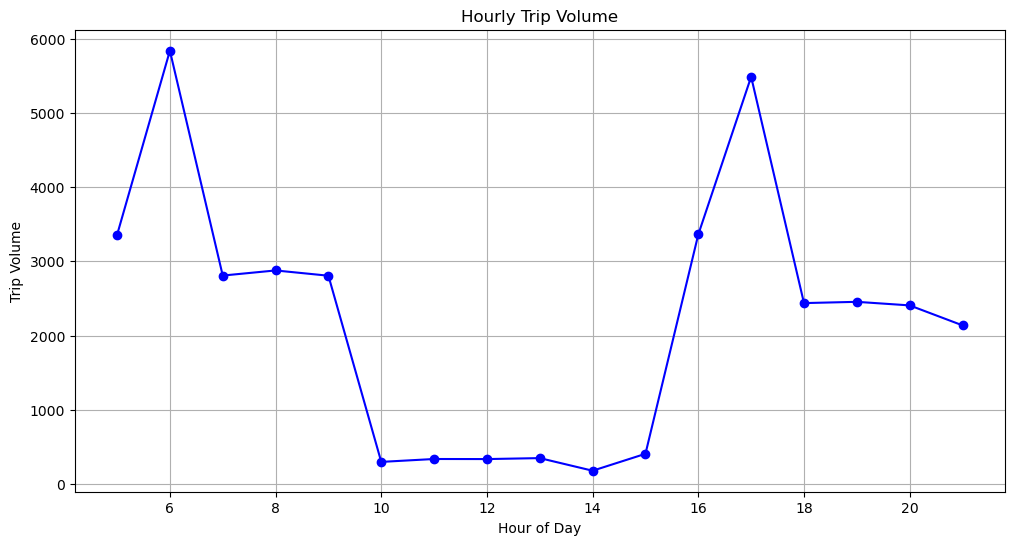

,tapInHour,Trip_Volume
1,6,5838
12,17,5487
11,16,3362
0,5,3355
3,8,2877


In [106]:
# Analyze peak operational hours for potential schedule optimization
# Grouping data by hour of day to find trip volume for each hour
hourly_trip_volume = data.groupby('tapInHour').size().reset_index(name='Trip_Volume')

# Identify peak hours (top 5 hours with the highest trip volume)
peak_hours = hourly_trip_volume.sort_values(by='Trip_Volume', ascending=False).head(5)

# Plotting hourly trip volume for visual insights
plt.figure(figsize=(12, 6))
plt.plot(hourly_trip_volume['tapInHour'], hourly_trip_volume['Trip_Volume'], marker='o', linestyle='-', color='blue')
plt.title('Hourly Trip Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Volume')
plt.grid(True)

plt.show()

peak_hours


Hasil analisis jam operasional menunjukkan beberapa waktu puncak yang signifikan dalam volume perjalanan, yang menjadi indikasi jam sibuk utama:

Waktu Puncak Operasional
Pagi Hari:

Jam 06:00 memiliki volume tertinggi dengan 5,838 perjalanan, menunjukkan kebutuhan armada tambahan pada jam keberangkatan kerja.
Jam 05:00 dan 08:00 juga memiliki volume yang tinggi, masing-masing 3,355 dan 2,877 perjalanan, yang menunjukkan bahwa jam keberangkatan pagi ini penting untuk pengaturan optimalisasi armada.
Sore Hari:

Jam 17:00 memiliki volume tinggi kedua dengan 5,487 perjalanan, diikuti oleh jam 16:00 dengan 3,362 perjalanan.
Waktu ini mencerminkan jam pulang kerja, di mana kebutuhan akan lebih banyak armada untuk memenuhi permintaan meningkat.
Insight
Peningkatan Armada pada Jam Sibuk: Dengan volume tinggi di pagi dan sore hari, armada tambahan dapat ditempatkan pada jam-jam ini untuk mengurangi kepadatan dan meningkatkan efisiensi operasional.
Pengaturan Waktu Keberangkatan yang Lebih Sering: Pada jam sibuk, jadwal keberangkatan dapat disesuaikan untuk lebih sering mengakomodasi jumlah penumpang yang tinggi, terutama pada koridor yang sering digunakan di waktu ini.
Rekomendasi
Optimisasi Jadwal Operasional: Jadwal keberangkatan yang lebih rapat pada jam 05:00 hingga 08:00 pagi, serta jam 16:00 hingga 17:00 sore, dapat membantu mengelola permintaan tinggi dan mengurangi kepadatan.
Pengelolaan Armada pada Koridor Utama: Mengarahkan armada tambahan ke koridor dengan volume tinggi selama waktu-waktu ini dapat meningkatkan efisiensi dan kepuasan penumpang.
Mengalokasikan lebih banyak armada dan mengatur jadwal keberangkatan lebih sering pada jam-jam sibuk akan memastikan operasi yang lebih efektif dan responsif terhadap kebutuhan penumpang di waktu-waktu puncak

In [ ]:
# Perjalanan Tanpa Tap Out

In [104]:
# Analyze trips without tap-out data
# Filter records with missing tap-out information
missing_tapout_data = data[data['missing_tapOutStops'] == True]

# Calculate the percentage of trips missing tap-out data
total_trips = data.shape[0]
missing_tapout_percentage = (missing_tapout_data.shape[0] / total_trips) * 100

# Analyze the distribution of missing tap-out data by corridor and hour
missing_tapout_by_corridor = missing_tapout_data['corridorName'].value_counts().head(5)
missing_tapout_by_hour = missing_tapout_data['tapInHour'].value_counts().sort_index()

# Display results
missing_tapout_percentage, missing_tapout_by_corridor, missing_tapout_by_hour


(3.5967993239496128,
 Kebayoran Lama - Tanah Abang    21
 Cilincing - Rorotan             18
 Cibubur - BKN                   17
 Ciledug - Tendean               17
 Senen - Blok M                  17
 Name: corridorName, dtype: int64,
 5     120
 6     216
 7     113
 8      97
 9      90
 10     10
 11      6
 12      8
 13      8
 14     11
 15     17
 16    127
 17    203
 18    100
 19     89
 20     78
 21     69
 Name: tapInHour, dtype: int64)

In [105]:
# Chi-Square test for association between peak hours and missing tap-out cases

# Define peak hours (morning: 5-9, evening: 16-19)
data['is_peak_hour'] = data['tapInHour'].apply(lambda x: 1 if (5 <= x <= 9 or 16 <= x <= 19) else 0)

# Contingency table for peak hours and missing tap-out stops
peak_hour_missing_tapout_contingency = pd.crosstab(data['is_peak_hour'], data['missing_tapOutStops'])

# Perform Chi-Square test for association
chi2_peak_hour, p_value_peak_hour, _, _ = stats.chi2_contingency(peak_hour_missing_tapout_contingency)

peak_hour_missing_tapout_contingency, chi2_peak_hour, p_value_peak_hour


(missing_tapOutStops  False  True 
 is_peak_hour                     
 0                     6236    207
 1                    30269   1155,
 3.1698058907545965,
 0.0750113608449472)

Hasil analisis perjalanan tanpa data tap-out menunjukkan beberapa poin penting:

1. Persentase Perjalanan Tanpa Tap-Out:
Dari total perjalanan, 3.6% tidak memiliki data tap-out, yang mencerminkan sejumlah perjalanan dengan data yang tidak lengkap.
2. Koridor dengan Kasus Tap-Out Hilang Terbanyak:
Kebayoran Lama - Tanah Abang memiliki 21 kasus, diikuti oleh:
Cilincing - Rorotan: 18 kasus
Cibubur - BKN: 17 kasus
Ciledug - Tendean: 17 kasus
Senen - Blok M: 17 kasus
Koridor-koridor ini mungkin memiliki kendala teknis atau faktor lain yang menyebabkan hilangnya data tap-out lebih sering dibandingkan koridor lainnya.

3. Distribusi Jam Perjalanan Tanpa Tap-Out:
Puncak kejadian tap-out hilang terjadi pada jam 06:00 pagi (216 kasus) dan jam 17:00 sore (203 kasus), yang merupakan jam sibuk keberangkatan dan kepulangan kerja.
Jam lain dengan jumlah kasus tinggi termasuk jam 16:00 (127 kasus), 7:00 (113 kasus), dan 18:00 (100 kasus).
Insight
Tingkatkan Pemantauan di Koridor Tertentu: Beberapa koridor menunjukkan kecenderungan lebih tinggi untuk kehilangan data tap-out, yang mungkin disebabkan oleh masalah teknis atau prosedur.
Jam Sibuk dan Pengelolaan Tap-Out: Jam sibuk pagi dan sore menunjukkan lebih banyak kasus tap-out hilang. Ini mungkin terjadi karena lonjakan penumpang yang menyebabkan kesalahan pencatatan atau kegagalan sistem.


Hasil uji Chi-Square menunjukkan:

Hubungan antara Jam Sibuk dan Kasus Tap-Out Hilang:
Nilai Chi-Square sebesar 3.17 dengan p-value sebesar 0.075.
Karena p-value lebih besar dari 0.05, tidak ada hubungan signifikan antara jam sibuk dan kasus tap-out yang hilang secara statistik.
Kesimpulan
Data tidak menunjukkan hubungan yang signifikan antara jam sibuk dan hilangnya data tap-out. Ini mengindikasikan bahwa kasus tap-out hilang mungkin lebih dipengaruhi oleh faktor lain selain kepadatan pada jam sibuk, seperti masalah teknis atau prosedural di beberapa koridor.

Rekomendasi
Fokus pada Perbaikan Teknis: Mengingat tidak ada korelasi dengan jam sibuk, audit dan pemeliharaan perangkat tap-out di koridor tertentu mungkin lebih efektif untuk mengurangi kasus tap-out hilang.
Pantau Koridor Spesifik: Lebih memusatkan pemantauan pada koridor-koridor dengan frekuensi tap-out hilang tinggi untuk memastikan pencatatan data yang lengkap